# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [6]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100) 
sns.set(style='whitegrid')
sns.set_palette("husl")

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
!pip install pyarrow
!pip install fastparquet

   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.3 MB 653.6 kB/s eta 0:00:39
   ---------------------------------------- 0.3/25.3 MB 3.2 MB/s eta 0:00:08
   - -------------------------------------- 0.7/25.3 MB 4.8 MB/s eta 0:00:06
   - -------------------------------------- 1.1/25.3 MB 5.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/25.3 MB 6.3 MB/s eta 0:00:04
   -- ------------------------------------- 1.9/25.3 MB 6.6 MB/s eta 0:00:04
   --- ------------------------------------ 2.4/25.3 MB 7.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.7/25.3 MB 7.2 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/25.3 MB 7.4 MB/s eta 0:00:04
   ----- ---------------------------------- 3.6/25.3 MB 7.7 MB/s eta 0:00:03
   ------ --------------------------------- 4.1/25.3 MB 7.9 MB/s eta 0:00:03
   ------ -


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/671.0 kB ? eta -:--:--
   --- ------------------------------------ 51.2/671.0 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 409.6/671.0 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 671.0/671.0 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB 9.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 8.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 9.4 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
# Try loading one file

df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
# import os
# os.getcwd()
# os.chdir("E:\\MS-IIITB-LJMU\\EDA - Assignment\\")

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [19]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
path = os.getcwd()
# path = r"E:\MS-IIITB-LJMU\EDA - Assignment\Datasets and Dictionary\trip_records"

# Create a list of all the twelve files to read
file_list = os.listdir(path)

# initialise an empty dataframe
df = pd.DataFrame()
sample_rate = 0.007 #0.7%


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
            date_data = monthly_data[monthly_data['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                # Sample 5% of the hourly data randomly
                hour_data = date_data[date_data['hour'] == hour]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=sample_rate, random_state=42)
                    # Append to sampled_data
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f"Processed {file_name}, Current total records: {len(df)}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# df = df.drop(['date', 'hour'], axis=1)

print(f"\nFinal number of records: {len(df)}")

Processed 2023-1.parquet, Current total records: 21288
Processed 2023-10.parquet, Current total records: 45696
Processed 2023-11.parquet, Current total records: 68811
Processed 2023-12.parquet, Current total records: 92163
Processed 2023-2.parquet, Current total records: 115780
Processed 2023-3.parquet, Current total records: 138719
Processed 2023-4.parquet, Current total records: 158265
Processed 2023-5.parquet, Current total records: 178473
Processed 2023-6.parquet, Current total records: 201283
Processed 2023-7.parquet, Current total records: 225646
Processed 2023-8.parquet, Current total records: 245763
Processed 2023-9.parquet, Current total records: 265487

Final number of records: 265487


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [40]:
parent_path = os.path.dirname(os.path.dirname(path))
parent_path

'E:\\MS-IIITB-LJMU\\EDA - Assignment'

In [41]:
# Store the df in csv/parquet
# df.to_parquet('')

# Save as Parquet
parquet_file = os.path.join(parent_path, 'sampled_data.parquet')
df.to_parquet(parquet_file)

#Save as csv
csv_file = os.path.join(parent_path, 'sampled_data.csv')
df.to_csv(csv_file, index=False)

print(f"Data saved as:\n1. {parquet_file}\n2. {csv_file}")

Data saved as:
1. E:\MS-IIITB-LJMU\EDA - Assignment\sampled_data.parquet
2. E:\MS-IIITB-LJMU\EDA - Assignment\sampled_data.csv


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [43]:
# Load the new data file
df = pd.read_parquet(parquet_file)
df.shape

(265487, 22)

In [44]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [47]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN

In [48]:
print("Comparison of airport fee columns:")
print("\nairport_fee unique values:", df['airport_fee'].unique())
print("Airport_fee unique values:", df['Airport_fee'].unique())

print("\nCount of non-null values:")
print("airport_fee:", df['airport_fee'].count())
print("Airport_fee:", df['Airport_fee'].count())

Comparison of airport fee columns:

airport_fee unique values: [1.25 0.    nan]
Airport_fee unique values: [  nan  0.    1.75 -1.75  1.25]

Count of non-null values:
airport_fee: 20782
Airport_fee: 235874


In [49]:
# Check if the values are same where both are non-null
mask = df['airport_fee'].notna() & df['Airport_fee'].notna()
comparison = df[mask]['airport_fee'] == df[mask]['Airport_fee']
print("\nAre values same where both columns have data:", comparison.all())


Are values same where both columns have data: True


Observations

airport_fee has fewer non-null values (20,782) but simpler value range  

Airport_fee has more non-null values (235,874) but includes additional values (1.75, -1.7)  

Where both columns have values, they match (comparison.all() is True)

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [50]:
# First, combine airport fee information
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

# Fix the index and drop any columns that are not needed
columns_to_drop = ['date', 'hour', 'Airport_fee', 'store_and_fwd_flag']
df_cleaned = df.drop(columns=columns_to_drop)

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Verify the changes
print("Updated Dataset Info:")
print(df_cleaned.info())
print("\nUnique values in airport_fee after combining:")
print(df_cleaned['airport_fee'].value_counts(dropna=False))
print("\nFirst few rows:")
print(df_cleaned.head())


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   PULocationID           265487 non-null  int64         
 7   DOLocationID           265487 non-null  int64         
 8   payment_type           265487 non-null  int64         
 9   fare_amount            265487 non-null  float64       
 10  extra                  265487 non-null  float64       
 11  mta_tax                265487 non-null  float64       
 12  tip_amount            

In [52]:
df_cleaned.head(40)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9          1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
10         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
11         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
13         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
14         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
16         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
18         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
19         1  2023-01-01 00:13:56   2023-01-01 00:23:05              4.0   
20         1  2023-01-01 00:58:43   2023-01-01 01:06:07              2.0   
21         2  2023-01-01 00:52:35   2023-01-01 01:14:24              1.0   
22         2  2023-01-01 00:47:20   2023-01-01 01:31:34              6.0   
23         2  2023-01-01 00:13:02   2023-01-01 00:26:20              1.0   
24         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
25         2  2023-01-01 00:58:15   2023-01-01 01:12:43              1.0   
26         2  2023-01-01 00:24:12   2023-01-01 00:48:09              2.0   
27         2  2023-01-01 00:41:09   2023-01-01 01:00:39              3.0   
28         2  2023-01-01 00:35:20   2023-01-01 00:47:11              1.0   
29         2  2023-01-01 00:28:15   2023-01-01 00:42:35              5.0   
30         1  2023-01-01 00:04:34   2023-01-01 00:17:32              1.0   
31         2  2023-01-01 00:41:22   2023-01-01 00:47:01              1.0   
32         2  2023-01-01 00:13:04   2023-01-01 00:22:10              1.0   
33         2  2023-01-01 00:06:59   2023-01-01 00:32:48              2.0   
34         1  2023-01-01 00:30:47   2023-01-01 01:01:43              3.0   
35         1  2023-01-01 00:16:59   2023-01-01 00:22:09              1.0   
36         1  2023-01-01 00:43:36   2023-01-01 00:54:58              1.0   
37         2  2023-01-01 01:22:58   2023-01-01 01:47:54              1.0   
38         2  2023-01-01 01:48:45   2023-01-01 01:56:29              2.0   
39         2  2023-01-01 01:03:47   2023-01-01 01:59:39              2.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            7.74         1.0           138           256             2   
1            1.24         1.0           161           237             1   
2            1.44         1.0           237           141             2   
3            0.54         1.0           143           142             2   
4           19.24         NaN            66           107             0   
5            7.10         1.0           246            37             1   
6            1.59         1.0            79           164             1   
7            3.16         1.0            79           256             1   
8            7.64         1.0           132            95             1   
9            0.90         1.0           148           114             1   
10           0.78         1.0           237           229     

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [53]:
# check where values of fare amount are negative
# List of monetary columns
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                   'tolls_amount', 'improvement_surcharge', 'total_amount', 
                   'congestion_surcharge', 'airport_fee']

# Check negative values in monetary columns
print("Number of negative values in monetary columns:")
for col in monetary_columns:
    neg_count = (df_cleaned[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} negative values")
        print("Sample of negative values:")
        print(df_cleaned[df_cleaned[col] < 0][col].head())
        print("-"*50)


Number of negative values in monetary columns:
extra: 1 negative values
Sample of negative values:
42134   -2.5
Name: extra, dtype: float64
--------------------------------------------------
mta_tax: 11 negative values
Sample of negative values:
47880   -0.5
50486   -0.5
63978   -0.5
90839   -0.5
94954   -0.5
Name: mta_tax, dtype: float64
--------------------------------------------------
improvement_surcharge: 11 negative values
Sample of negative values:
47880   -1.0
50486   -1.0
63978   -1.0
90839   -1.0
94954   -1.0
Name: improvement_surcharge, dtype: float64
--------------------------------------------------
total_amount: 11 negative values
Sample of negative values:
47880   -4.00
50486   -1.50
63978   -3.25
90839   -4.00
94954   -1.50
Name: total_amount, dtype: float64
--------------------------------------------------
congestion_surcharge: 6 negative values
Sample of negative values:
47880    -2.5
90839    -2.5
134619   -2.5
138638   -2.5
139776   -2.5
Name: congestion_surcharge

Did you notice something different in the `RatecodeID` column for above records?

In [54]:
# Analyse RatecodeID 
# Check unique values and their counts in RatecodeID
print("Unique values in RatecodeID:")
print(df_cleaned['RatecodeID'].value_counts(dropna=True))
print("\nNumber of NaN values:", df_cleaned['RatecodeID'].isna().sum())


Unique values in RatecodeID:
RatecodeID
1.0     242253
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

Number of NaN values: 8831


In [57]:
# First, let's see some examples of records with RatecodeID = 99
print("Sample records with RatecodeID = 99:")
print(df_cleaned[df_cleaned['RatecodeID'] == 99].head())

Sample records with RatecodeID = 99:
      VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
231          1  2023-01-01 11:39:40   2023-01-01 11:55:59              1.0   
698          1  2023-01-02 13:09:05   2023-01-02 13:25:32              1.0   
1238         1  2023-01-03 13:07:10   2023-01-03 13:42:25              1.0   
1305         1  2023-01-03 15:30:26   2023-01-03 16:39:39              1.0   
1646         1  2023-01-04 07:35:07   2023-01-04 07:56:45              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
231             2.9        99.0            42            47             1   
698             6.9        99.0           137            42             1   
1238            0.0        99.0            14           216             1   
1305           13.0        99.0           141            35             1   
1646            3.3        99.0           218           130             1   

      fare_amount  extra  mta_t

In [58]:
# Find which columns have negative values
print("Before fix - RatecodeID unique values:")
print(df_cleaned['RatecodeID'].value_counts(dropna=False))

# Fill NaN with 1 and convert to integer
df_cleaned['RatecodeID'] = df_cleaned['RatecodeID'].fillna(1).astype(int)

print("\nAfter fix - RatecodeID unique values:")
print(df_cleaned['RatecodeID'].value_counts())

# Now let's proceed with checking negative values in monetary columns
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                   'tolls_amount', 'improvement_surcharge', 'total_amount', 
                   'congestion_surcharge', 'airport_fee']

print("\nNumber of negative values in monetary columns:")
for col in monetary_columns:
    neg_count = (df_cleaned[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} negative values")


Before fix - RatecodeID unique values:
RatecodeID
1.0     242253
2.0      10081
NaN       8831
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

After fix - RatecodeID unique values:
RatecodeID
1     251084
2      10081
99      1530
5       1428
3        845
4        519
Name: count, dtype: int64

Number of negative values in monetary columns:
extra: 1 negative values
mta_tax: 11 negative values
improvement_surcharge: 11 negative values
total_amount: 11 negative values
congestion_surcharge: 6 negative values
airport_fee: 2 negative values


In [59]:
def clean_ratecode(x):
    if x == 99:
        return 1  # Convert 99 to standard rate (1)
    elif x in [1, 2, 3, 4, 5]:  # These are all the values we actually see in data
        return x
    else:
        return 1  # Any other values get standard rate

# Apply the cleaning
df_cleaned['RatecodeID'] = df_cleaned['RatecodeID'].apply(clean_ratecode)

# Verify the changes
print("After cleaning RatecodeID (including 99):")
print(df_cleaned['RatecodeID'].value_counts())

After cleaning RatecodeID (including 99):
RatecodeID
1    252614
2     10081
5      1428
3       845
4       519
Name: count, dtype: int64


In [60]:
# Let's first look at the records with negative values to understand the pattern
print("Sample records with negative values in monetary columns:")
for col in monetary_columns:
    if (df_cleaned[col] < 0).sum() > 0:
        print(f"\nNegative values in {col}:")
        print(df_cleaned[df_cleaned[col] < 0][[col, 'total_amount', 'fare_amount']].head())

Sample records with negative values in monetary columns:

Negative values in extra:
       extra  total_amount  fare_amount
42134   -2.5           4.0          3.0

Negative values in mta_tax:
       mta_tax  total_amount  fare_amount
47880     -0.5         -4.00          0.0
50486     -0.5         -1.50          0.0
63978     -0.5         -3.25          0.0
90839     -0.5         -4.00          0.0
94954     -0.5         -1.50          0.0

Negative values in improvement_surcharge:
       improvement_surcharge  total_amount  fare_amount
47880                   -1.0         -4.00          0.0
50486                   -1.0         -1.50          0.0
63978                   -1.0         -3.25          0.0
90839                   -1.0         -4.00          0.0
94954                   -1.0         -1.50          0.0

Negative values in total_amount:
       total_amount  total_amount  fare_amount
47880         -4.00         -4.00          0.0
50486         -1.50         -1.50          0.0
6

**These look like refunds or charge reversals rather than errors. Let's handle them appropriately:**

In [61]:
# fix these negative values
refund_mask = df_cleaned['total_amount'] < 0

# Print summary of refund transactions
print("Number of refund transactions:", refund_mask.sum())
print("\nSummary of refund transactions:")
print(df_cleaned[refund_mask][monetary_columns].describe())

# We should keep these negative values as they appear to be legitimate refunds
# But let's add a new column to flag them
df_cleaned['is_refund'] = refund_mask

# Verify the changes
print("\nNumber of refund transactions flagged:", df_cleaned['is_refund'].sum())


Number of refund transactions: 11

Summary of refund transactions:
       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
count         11.0   11.0     11.0        11.0          11.0   
mean           0.0    0.0     -0.5         0.0           0.0   
std            0.0    0.0      0.0         0.0           0.0   
min            0.0    0.0     -0.5         0.0           0.0   
25%            0.0    0.0     -0.5         0.0           0.0   
50%            0.0    0.0     -0.5         0.0           0.0   
75%            0.0    0.0     -0.5         0.0           0.0   
max            0.0    0.0     -0.5         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
count                   11.0     11.000000             11.000000    11.000000  
mean                    -1.0     -3.181818             -1.363636    -0.318182  
std                      0.0      1.118542              1.305582     0.707910  
min                     -1.0     -4.

In [62]:
# Create a list of all monetary columns for future reference
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                   'tolls_amount', 'improvement_surcharge', 'total_amount', 
                   'congestion_surcharge', 'airport_fee']

# Add the refund flag column
df_cleaned['is_refund'] = df_cleaned['total_amount'] < 0

# Verify the final state of monetary columns
print("Final check - Number of negative values in each column:")
for col in monetary_columns:
    neg_count = (df_cleaned[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count} negative values")

print("\nTotal number of refund transactions:", df_cleaned['is_refund'].sum())

Final check - Number of negative values in each column:
extra: 1 negative values
mta_tax: 11 negative values
improvement_surcharge: 11 negative values
total_amount: 11 negative values
congestion_surcharge: 6 negative values
airport_fee: 2 negative values

Total number of refund transactions: 11


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [63]:
# Calculate the proportion of missing values in each column
missing_proportions = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Sort in descending order for better visualization
missing_proportions_sorted = missing_proportions.sort_values(ascending=False)

# Display missing value proportions
print("Proportion of missing values in each column:")
print("\nColumn Name                  Missing %")
print("-" * 45)
for col, prop in missing_proportions_sorted.items():
    if prop > 0:  # Only show columns with missing values
        print(f"{col:<30} {prop:>6.2f}%")

# Get total number of rows for reference
print(f"\nTotal number of rows in dataset: {len(df_cleaned)}")

Proportion of missing values in each column:

Column Name                  Missing %
---------------------------------------------
airport_fee                      3.33%
passenger_count                  3.33%
congestion_surcharge             3.33%

Total number of rows in dataset: 265487


In [65]:
# Let us check if missing values occur in the same rows
missing_rows = {
    'airport_fee': df_cleaned['airport_fee'].isnull().sum(),
    'passenger_count': df_cleaned['passenger_count'].isnull().sum(),
    'congestion_surcharge': df_cleaned['congestion_surcharge'].isnull().sum(),
    'overlapping': df_cleaned[df_cleaned['airport_fee'].isnull() & 
                             df_cleaned['passenger_count'].isnull() & 
                             df_cleaned['congestion_surcharge'].isnull()].shape[0]
}

print("Missing value analysis:")
print("-" * 45)
for key, value in missing_rows.items():
    print(f"{key:<20} {value:>10}")

# Look at a sample of rows with missing values to understand the pattern
print("\nSample of rows with missing values:")
print(df_cleaned[df_cleaned['passenger_count'].isnull()].head(20))

Missing value analysis:
---------------------------------------------
airport_fee                8831
passenger_count            8831
congestion_surcharge       8831
overlapping                8831

Sample of rows with missing values:
     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4           2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15          2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40          2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41          2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56          2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
69          2  2023-01-01 01:03:24   2023-01-01 01:17:10              NaN   
84          1  2023-01-01 02:51:58   2023-01-01 03:00:53              NaN   
93          2  2023-01-01 02:12:18   2023-01-01 02:42:53              NaN   
97          2  2023-01-01 02:10:40   2023-01-01 02:39:28              Na

In [70]:
# Find the proportion of missing values in each column
# For passenger_count: fill with median of non-null values
median_passengers = df_cleaned['passenger_count'].median()
df_cleaned['passenger_count'] = df_cleaned['passenger_count'].fillna(median_passengers)

# For congestion_surcharge: fill with 0 as it seems these trips might be exempt
df_cleaned['congestion_surcharge'] = df_cleaned['congestion_surcharge'].fillna(0)

# For airport_fee: fill with 0 as these don't appear to be airport trips
df_cleaned['airport_fee'] = df_cleaned['airport_fee'].fillna(0)

# Fix payment_type = 0 (invalid value)
df_cleaned.loc[df_cleaned['payment_type'] == 0, 'payment_type'] = 1  # Set to 1 (credit card) since they have tips

# Verify the changes
print("\nMissing values after fixing:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

# Head(15)
print("\nhead(15)")
df_cleaned.head(15)


Missing values after fixing:
Series([], dtype: int64)

head(15)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
5          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9          1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
10         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
11         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
13         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
14         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            7.74           1           138           256             2   
1            1.24           1           161           237             1   
2            1.44           1           237           141             2   
3            0.54           1           143           142             2   
4           19.24           1            66           107             1   
5            7.10           1           246            37             1   
6            1.59           1            79           164             1   
7            3.16           1            79           256             1   
8            7.64           1           132            95             1   
9            0.90           1           148           114             1   
10           0.78           1           237           229             2   
11           2.78           1            79           186             1   
12           0.85           1            90            68             1   
13           4.37           1           142           148             1   
14           2.43           1           144           186             1   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         32.40    6.0      0.5        0.00           0.0   
1          7.90    1.0      0.5        2.58           0.0   
2         11.40    1.0      0.5        0.00           0.0   
3          6.50    1.0      0.5        0.00           0.0   
4         25.64    0.0      0.5        5.93           0.0   
5         34.50    3.5      0.5        7.90           0.0   
6         11.40    1.0      0.5        3.28           0.0   
7         19.10    1.0      0.5        6.02           0.0   
8         31.70    1.0      0.5        7.09           0.0   
9          7.90    3.5      0.5        1.00           0.0   
10         7.20    1.0      0.5        0.00           0.0   
11        19.80    1.0      0.5        4.96           0.0   
12        10.00    1.0      0.5        3.75           0.0   
13        25.40    1.0      0.5        9.12           0.0   
14        18.40    1.0      0.5        4.68           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                     1.0         41.15                   0.0         1.25   
1                     1.0         15.48                   2.5         0.00   
2                     1.0         16.40                   2.5         0.00   
3                     1.0         11.50                   2.5         0.00   
4                     1.0         35.57                   0.0         0.00   
5                     1.0         47.40                   2.5         0.00   
6                     1.0         19.68                   2.5  

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Fix missing values in 'RatecodeID'


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

**Missing values for passenger_count and RatecodeID have been already handled, lets verify to be sure**

In [71]:
# Check current state of these columns
print("Current state of columns:")
print("\npassenger_count unique values:")
print(df_cleaned['passenger_count'].value_counts(dropna=False))

print("\nRatecodeID unique values:")
print(df_cleaned['RatecodeID'].value_counts(dropna=False))

print("\ncongestion_surcharge unique values:")
print(df_cleaned['congestion_surcharge'].value_counts(dropna=False))

# Verify if there are any remaining missing values
missing_check = df_cleaned[['passenger_count', 'RatecodeID', 'congestion_surcharge']].isnull().sum()
print("\nRemaining missing values:")
print(missing_check)

# Summary statistics for these columns
print("\nSummary statistics:")
print(df_cleaned[['passenger_count', 'RatecodeID', 'congestion_surcharge']].describe())

Current state of columns:

passenger_count unique values:
passenger_count
1.0    202229
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

RatecodeID unique values:
RatecodeID
1    252614
2     10081
5      1428
3       845
4       519
Name: count, dtype: int64

congestion_surcharge unique values:
congestion_surcharge
 2.5    236938
 0.0     28543
-2.5         6
Name: count, dtype: int64

Remaining missing values:
passenger_count         0
RatecodeID              0
congestion_surcharge    0
dtype: int64

Summary statistics:
       passenger_count     RatecodeID  congestion_surcharge
count    265487.000000  265487.000000         265487.000000
mean          1.355208       1.071717              2.231107
std           0.878186       0.386284              0.774734
min           0.000000       1.000000             -2.500000
25%           1.000000       1.000000              2.500000
50%     

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# passenger count has 0, a taxi cant have a fare with 0 passengers


In [72]:
# handle null values in congestion_surcharge
# Clean passenger_count
def clean_passenger_count(x):
    if pd.isna(x) or x <= 0 or x > 6:  # 6 is max reasonable capacity
        return 1  # most common value
    else:
        return round(x)  # convert to integer

# Clean congestion_surcharge (keep negative values as they're part of refunds)
def clean_congestion_surcharge(x):
    if pd.isna(x):
        return 0
    else:
        return x

# Apply the cleaning functions
df_cleaned['passenger_count'] = df_cleaned['passenger_count'].apply(clean_passenger_count)
df_cleaned['congestion_surcharge'] = df_cleaned['congestion_surcharge'].apply(clean_congestion_surcharge)

# Verify the changes
print("After cleaning - Passenger count values:")
print(df_cleaned['passenger_count'].value_counts().sort_index())

print("\nAfter cleaning - Congestion surcharge values:")
print(df_cleaned['congestion_surcharge'].value_counts().sort_index())



After cleaning - Passenger count values:
passenger_count
1    206304
2     38669
3      9640
4      5340
5      3300
6      2234
Name: count, dtype: int64

After cleaning - Congestion surcharge values:
congestion_surcharge
-2.5         6
 0.0     28543
 2.5    236938
Name: count, dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [73]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# Select numerical columns for outlier analysis
numerical_cols = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']

# Calculate summary statistics and box plot parameters
def get_outlier_stats(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(df)) * 100
    }

# Calculate and display outlier statistics for each column
for col in numerical_cols:
    stats = get_outlier_stats(df_cleaned, col)
    print(f"\nOutlier Analysis for {col}:")
    print("-" * 50)
    print(f"Q1: {stats['Q1']:.2f}")
    print(f"Q3: {stats['Q3']:.2f}")
    print(f"IQR: {stats['IQR']:.2f}")
    print(f"Lower bound: {stats['lower_bound']:.2f}")
    print(f"Upper bound: {stats['upper_bound']:.2f}")
    print(f"Number of outliers: {stats['outlier_count']}")
    print(f"Percentage of outliers: {stats['outlier_percentage']:.2f}%")
    
    # Display some example outliers
    print("\nExample outliers:")
    outliers = df_cleaned[(df_cleaned[col] < stats['lower_bound']) | 
                         (df_cleaned[col] > stats['upper_bound'])][col]
    print(outliers.head())



Outlier Analysis for trip_distance:
--------------------------------------------------
Q1: 1.05
Q3: 3.40
IQR: 2.35
Lower bound: -2.47
Upper bound: 6.92
Number of outliers: 34713
Percentage of outliers: 13.08%

Example outliers:
0      7.74
4     19.24
5      7.10
8      7.64
15    10.77
Name: trip_distance, dtype: float64

Outlier Analysis for fare_amount:
--------------------------------------------------
Q1: 9.30
Q3: 21.90
IQR: 12.60
Lower bound: -9.60
Upper bound: 40.80
Number of outliers: 27440
Percentage of outliers: 10.34%

Example outliers:
15    45.38
24    70.00
39    58.30
49    45.70
52    50.00
Name: fare_amount, dtype: float64

Outlier Analysis for total_amount:
--------------------------------------------------
Q1: 15.96
Q3: 30.80
IQR: 14.84
Lower bound: -6.30
Upper bound: 53.06
Number of outliers: 30566
Percentage of outliers: 11.51%

Example outliers:
15    67.12
24    81.80
39    75.96
49    61.00
52    61.20
Name: total_amount, dtype: float64

Outlier Analysis for ti

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [74]:
# 1. Create logical conditions for valid trips
def is_valid_trip(row):
    # Basic validity conditions
    conditions = {
        'distance_zero_fare_nonzero': row['trip_distance'] == 0 and row['fare_amount'] > 0,
        'distance_high': row['trip_distance'] > 100,  # unusually long trips
        'fare_too_high': row['fare_amount'] > 300,
        'fare_per_mile_high': row['trip_distance'] > 0 and (row['fare_amount'] / row['trip_distance']) > 50,
        'tip_proportion_high': row['fare_amount'] > 0 and (row['tip_amount'] / row['fare_amount']) > 0.5,
        'same_location_nonzero': row['PULocationID'] == row['DOLocationID'] and row['trip_distance'] > 0
    }
    return conditions

# Check suspicious trips
print("Analyzing suspicious trips...")
suspicious_counts = {
    'Zero distance, non-zero fare': len(df_cleaned[df_cleaned['trip_distance'] == 0][df_cleaned['fare_amount'] > 0]),
    'Very long trips (>100 miles)': len(df_cleaned[df_cleaned['trip_distance'] > 100]),
    'Very high fares (>$300)': len(df_cleaned[df_cleaned['fare_amount'] > 300]),
    'High fare per mile (>$50/mile)': len(df_cleaned[df_cleaned['trip_distance'] > 0][df_cleaned['fare_amount'] / df_cleaned['trip_distance'] > 50]),
    'High tip proportion (>50% of fare)': len(df_cleaned[df_cleaned['fare_amount'] > 0][df_cleaned['tip_amount'] / df_cleaned['fare_amount'] > 0.5]),
    'Same location but non-zero distance': len(df_cleaned[df_cleaned['PULocationID'] == df_cleaned['DOLocationID']][df_cleaned['trip_distance'] > 0])
}

print("\nSuspicious trip counts:")
for key, value in suspicious_counts.items():
    print(f"{key}: {value}")


Analyzing suspicious trips...

Suspicious trip counts:
Zero distance, non-zero fare: 5226
Very long trips (>100 miles): 5
Very high fares (>$300): 23
High fare per mile (>$50/mile): 869
High tip proportion (>50% of fare): 2770
Same location but non-zero distance: 11872


In [75]:
# Create a copy of the dataframe
df_cleaned_new = df_cleaned.copy()

# 1. Handle zero distance, non-zero fare
mask_zero_dist = (df_cleaned_new['trip_distance'] == 0) & (df_cleaned_new['fare_amount'] > 0)
# Calculate minimum distance based on fare (assuming max rate of $5/mile)
df_cleaned_new.loc[mask_zero_dist, 'trip_distance'] = df_cleaned_new.loc[mask_zero_dist, 'fare_amount'] / 5

# 2. Handle very long trips
df_cleaned_new.loc[df_cleaned_new['trip_distance'] > 100, 'trip_distance'] = df_cleaned_new['trip_distance'].median()

# 3 & 4. Handle high fares and fare per mile
# Calculate reasonable fare per mile
df_cleaned_new['fare_per_mile'] = df_cleaned_new.apply(
    lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] > 0 else 0, axis=1
)
# Cap fare per mile at $50
mask_high_fare = df_cleaned_new['fare_per_mile'] > 50
df_cleaned_new.loc[mask_high_fare, 'fare_amount'] = df_cleaned_new.loc[mask_high_fare, 'trip_distance'] * 50

# 5. Handle high tips
mask_high_tip = df_cleaned_new['tip_amount'] > (df_cleaned_new['fare_amount'] * 0.5)
df_cleaned_new.loc[mask_high_tip, 'tip_amount'] = df_cleaned_new.loc[mask_high_tip, 'fare_amount'] * 0.2

# Remove temporary column
df_cleaned_new = df_cleaned_new.drop('fare_per_mile', axis=1)

# Print summary of changes
print("Summary after cleaning:")
print("\nTrip Distance Statistics:")
print(df_cleaned_new['trip_distance'].describe())
print("\nFare Amount Statistics:")
print(df_cleaned_new['fare_amount'].describe())
print("\nTip Amount Statistics:")
print(df_cleaned_new['tip_amount'].describe())

# Count remaining suspicious cases
suspicious_after = {
    'Zero distance, non-zero fare': len(df_cleaned_new[
        (df_cleaned_new['trip_distance'] == 0) & (df_cleaned_new['fare_amount'] > 0)
    ]),
    'Very long trips (>100 miles)': len(df_cleaned_new[df_cleaned_new['trip_distance'] > 100]),
    'High fare per mile (>$50/mile)': len(df_cleaned_new[
        df_cleaned_new.apply(
            lambda x: x['fare_amount'] / x['trip_distance'] > 50 if x['trip_distance'] > 0 else False, 
            axis=1
        )
    ])
}

print("\nRemaining suspicious cases:")
for key, value in suspicious_after.items():
    print(f"{key}: {value}")

Summary after cleaning:

Trip Distance Statistics:
count    265487.000000
mean          3.544521
std           4.570818
min           0.000000
25%           1.100000
50%           1.840000
75%           3.520000
max         100.000000
Name: trip_distance, dtype: float64

Fare Amount Statistics:
count    265487.000000
mean         19.734881
std          17.961350
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         500.000000
Name: fare_amount, dtype: float64

Tip Amount Statistics:
count    265487.000000
mean          3.483712
std           3.878590
min           0.000000
25%           1.000000
50%           2.800000
75%           4.400000
max         103.840000
Name: tip_amount, dtype: float64

Remaining suspicious cases:
Zero distance, non-zero fare: 0
Very long trips (>100 miles): 0
High fare per mile (>$50/mile): 1


In [ ]:
# remove passenger_count > 6
# Not removed, but handled

In [76]:
# Continue with outlier handling
# Final cleaning steps
df_final = df_cleaned_new.copy()

# 1. Handle the last remaining high fare-per-mile case
mask_high_fare_final = df_final.apply(
    lambda x: x['fare_amount'] / x['trip_distance'] > 50 if x['trip_distance'] > 0 else False, 
    axis=1
)
df_final.loc[mask_high_fare_final, 'fare_amount'] = df_final.loc[mask_high_fare_final, 'trip_distance'] * 50

# 2. Cap maximum tip at 50% of fare or $50, whichever is lower
df_final['tip_amount'] = df_final.apply(
    lambda x: min(x['tip_amount'], x['fare_amount'] * 0.5, 50), 
    axis=1
)

# Verify final changes
print("Final Summary Statistics:")
print("\nTrip Distance Statistics:")
print(df_final['trip_distance'].describe())
print("\nFare Amount Statistics:")
print(df_final['fare_amount'].describe())
print("\nTip Amount Statistics:")
print(df_final['tip_amount'].describe())

# Calculate and show fare per mile distribution
df_final['fare_per_mile'] = df_final.apply(
    lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] > 0 else 0, 
    axis=1
)

print("\nFare per Mile Statistics:")
print(df_final['fare_per_mile'].describe())

# Remove temporary calculation column
df_final = df_final.drop('fare_per_mile', axis=1)


Final Summary Statistics:

Trip Distance Statistics:
count    265487.000000
mean          3.544521
std           4.570818
min           0.000000
25%           1.100000
50%           1.840000
75%           3.520000
max         100.000000
Name: trip_distance, dtype: float64

Fare Amount Statistics:
count    265487.000000
mean         19.734881
std          17.961350
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         500.000000
Name: fare_amount, dtype: float64

Tip Amount Statistics:
count    265487.000000
mean          3.482470
std           3.859544
min           0.000000
25%           1.000000
50%           2.800000
75%           4.400000
max          50.000000
Name: tip_amount, dtype: float64

Fare per Mile Statistics:
count    265487.000000
mean          7.843279
std           4.224128
min           0.000000
25%           5.515320
50%           7.099237
75%           8.977273
max          50.000000
Name: fare_per_mile, dtype: floa

**Min Max**
Imagine you're a teacher grading papers:

One test is out of 500 points (like our fare_amount: $0 to $500)  
Another test is out of 911 points (like our total_amount: -$4 to $911)  
To make these scores comparable, you convert everything to a 0-100% scale.

In [82]:
# Create copy of dataframe
df_scaled = df_final.copy()

# Columns identified for scaling (focusing on monetary values)
cols_to_scale = ['fare_amount', 'total_amount']

# Apply Min-Max scaling while keeping originals
for col in cols_to_scale:
    new_col_name = f'{col}_scaled'
    df_scaled[new_col_name] = (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Display results in a readable format
for col in cols_to_scale:
    new_col_name = f'{col}_scaled'
    print(f"\nScaled {col}:")
    print("-" * 50)
    stats = df_scaled[new_col_name].describe()
    for stat, value in stats.items():
        print(f"{stat:12} {value:10.3f}")
    print("\nOriginal vs Scaled Range:")
    print(f"Original:    Min = {df_scaled[col].min():10.2f}, Max = {df_scaled[col].max():10.2f}")
    print(f"Scaled:      Min = {df_scaled[new_col_name].min():10.2f}, Max = {df_scaled[new_col_name].max():10.2f}")
    print("-" * 50)


Scaled fare_amount:
--------------------------------------------------
count        265487.000
mean              0.039
std               0.036
min               0.000
25%               0.019
50%               0.027
75%               0.044
max               1.000

Original vs Scaled Range:
Original:    Min =       0.00, Max =     500.00
Scaled:      Min =       0.00, Max =       1.00
--------------------------------------------------

Scaled total_amount:
--------------------------------------------------
count        265487.000
mean              0.036
std               0.025
min               0.000
25%               0.022
50%               0.027
75%               0.038
max               1.000

Original vs Scaled Range:
Original:    Min =      -4.00, Max =     911.00
Scaled:      Min =       0.00, Max =       1.00
--------------------------------------------------


In [86]:
# Do any columns need standardising?
# List numerical columns that might need standardization
numerical_cols = ['trip_distance', 'tip_amount', 'tolls_amount', 
                 'congestion_surcharge', 'fare_amount_scaled','total_amount_scaled']

# Display summary statistics and ranges for these columns
print("Current ranges of numerical columns:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"Min: {df_scaled[col].min():.2f}")
    print(f"Max: {df_scaled[col].max():.2f}")
    print(f"Mean: {df_scaled[col].mean():.2f}")
    print(f"Std: {df_scaled[col].std():.2f}")

# Check if any columns need standardization based on their scales
need_standardization = []
for col in numerical_cols:
    if df_scaled[col].std() > 10 or df_scaled[col].mean() > 10:
        need_standardization.append(col)

print("\nColumns that might need standardization:")
for col in need_standardization:
    print(f"- {col}")


Current ranges of numerical columns:

trip_distance:
Min: 0.00
Max: 100.00
Mean: 3.54
Std: 4.57

tip_amount:
Min: 0.00
Max: 50.00
Mean: 3.48
Std: 3.86

tolls_amount:
Min: 0.00
Max: 143.00
Mean: 0.59
Std: 2.18

congestion_surcharge:
Min: -2.50
Max: 2.50
Mean: 2.23
Std: 0.77

fare_amount_scaled:
Min: 0.00
Max: 1.00
Mean: 0.04
Std: 0.04

total_amount_scaled:
Min: 0.00
Max: 1.00
Mean: 0.04
Std: 0.02

Columns that might need standardization:


In [87]:
# Check the very first dataframe size (before any cleaning)
print("Initial data from parquet files:")
print(f"Number of records: {len(df)}")

# Check after sampling (we used 0.007 sampling rate)
print("\nAfter sampling (0.007 rate):")
original_total = 3041714  # This was from the initial info() output you shared earlier
sampled_size = len(df)
scaled_size = len(df_scaled)
print(f"Original total records: {original_total:,}")
print(f"Sampled records: {sampled_size:,}")
print(f"Sampling reduced data by: {((original_total - sampled_size)/original_total)*100:.2f}%")
print(f"Min Max reduced data by: {((sampled_size - scaled_size)/sampled_size)*100:.2f}%")

Initial data from parquet files:
Number of records: 265487

After sampling (0.007 rate):
Original total records: 3,041,714
Sampled records: 265,487
Sampling reduced data by: 91.27%
Min Max reduced data by: 0.00%


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [91]:
print(df_scaled.columns.tolist())
print(df_scaled.shape)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'is_refund', 'fare_amount_scaled', 'total_amount_scaled']
(265487, 21)


#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [92]:
# Get all column names and their data types
print("Current Data Types in df_scaled:")
print("-" * 50)
for col in df_scaled.columns:
    print(f"{col:<25} {df_scaled[col].dtype}")

# Categorize variables
numerical_vars = []
categorical_vars = []

for col in df_scaled.columns:
    # Check if datetime
    if df_scaled[col].dtype == 'datetime64[ns]':
        categorical_vars.append(col)  # datetime can be treated as categorical
    # Check if numeric
    elif df_scaled[col].dtype in ['int64', 'float64']:
        numerical_vars.append(col)
    # Everything else is categorical
    else:
        categorical_vars.append(col)

print("\nNumerical Variables:")
print("-" * 50)
for var in numerical_vars:
    print(f"{var:<25} {df_scaled[var].dtype}")

print("\nCategorical Variables:")
print("-" * 50)
for var in categorical_vars:
    print(f"{var:<25} {df_scaled[var].dtype}")

# Further categorize numerical variables into continuous and discrete
continuous_vars = []
discrete_vars = []

for var in numerical_vars:
    if df_scaled[var].dtype == 'int64' or var in ['passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']:
        discrete_vars.append(var)
    else:
        continuous_vars.append(var)

print("\nNumerical Variables Subcategories:")
print("-" * 50)
print("\nContinuous Variables:")
for var in continuous_vars:
    print(f"{var:<25} {df_scaled[var].dtype}")

print("\nDiscrete Variables:")
for var in discrete_vars:
    print(f"{var:<25} {df_scaled[var].dtype}")

Current Data Types in df_scaled:
--------------------------------------------------
VendorID                  int64
tpep_pickup_datetime      datetime64[us]
tpep_dropoff_datetime     datetime64[us]
passenger_count           int64
trip_distance             float64
RatecodeID                int64
PULocationID              int64
DOLocationID              int64
payment_type              int64
fare_amount               float64
extra                     float64
mta_tax                   float64
tip_amount                float64
tolls_amount              float64
improvement_surcharge     float64
total_amount              float64
congestion_surcharge      float64
airport_fee               float64
is_refund                 bool
fare_amount_scaled        float64
total_amount_scaled       float64

Numerical Variables:
--------------------------------------------------
VendorID                  int64
passenger_count           int64
trip_distance             float64
RatecodeID                int64


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [93]:
df_scaled['hour'] = df_scaled['tpep_pickup_datetime'].dt.hour
df_scaled['day_of_week'] = df_scaled['tpep_pickup_datetime'].dt.day_name()
df_scaled['month'] = df_scaled['tpep_pickup_datetime'].dt.month_name()

In [94]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df_scaled.groupby('hour').size()
print("Hourly Distribution of Pickups:")
print("-" * 50)
print(hourly_pickups)


Hourly Distribution of Pickups:
--------------------------------------------------
hour
0      7508
1      5045
2      3321
3      2194
4      1502
5      1554
6      3673
7      7252
8     10055
9     11345
10    12307
11    13355
12    14507
13    14950
14    16023
15    16443
16    16461
17    17904
18    18746
19    16745
20    14928
21    14919
22    13810
23    10940
dtype: int64


In [95]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_pickups = df_scaled.groupby('day_of_week').size()
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(day_order)
print("\nDaily Distribution of Pickups:")
print("-" * 50)
print(daily_pickups)



Daily Distribution of Pickups:
--------------------------------------------------
day_of_week
Monday       33066
Tuesday      38385
Wednesday    40678
Thursday     41627
Friday       39511
Saturday     38672
Sunday       33548
dtype: int64


In [96]:
# Show the monthly trends in pickups
monthly_pickups = df_scaled.groupby('month').size()
# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(month_order)
print("\nMonthly Distribution of Pickups:")
print("-" * 50)
print(monthly_pickups)



Monthly Distribution of Pickups:
--------------------------------------------------
month
January      21288
February     20208
March        23617
April        22810
May          24363
June         22939
July         20117
August       19546
September    19724
October      24408
November     23115
December     23352
dtype: int64


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [97]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("\nZero/Negative Value Analysis:")
print("-" * 50)
for col in financial_cols:
    zeros = (df_scaled[col] == 0).sum()
    negatives = (df_scaled[col] < 0).sum()
    total = len(df_scaled)
    
    print(f"\n{col}:")
    print(f"Zero values: {zeros} ({(zeros/total)*100:.2f}%)")
    print(f"Negative values: {negatives} ({(negatives/total)*100:.2f}%)")



Zero/Negative Value Analysis:
--------------------------------------------------

fare_amount:
Zero values: 92 (0.03%)
Negative values: 0 (0.00%)

tip_amount:
Zero values: 60984 (22.97%)
Negative values: 0 (0.00%)

total_amount:
Zero values: 32 (0.01%)
Negative values: 11 (0.00%)

trip_distance:
Zero values: 38 (0.01%)
Negative values: 0 (0.00%)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [99]:
#Yes
df_no_zeros = df_scaled[
    (df_scaled['fare_amount'] > 0) & 
    (df_scaled['tip_amount'] >= 0) &  # Keep 0 tips as they're valid
    (df_scaled['total_amount'] > 0) & 
    (df_scaled['trip_distance'] > 0)
]
print("\nOriginal vs Filtered Dataset:")
print("-" * 50)
print(f"Original records: {len(df_scaled)}")
print(f"Records after removing zeros: {len(df_no_zeros)}")
print(f"Removed records: {len(df_scaled) - len(df_no_zeros)} ({((len(df_scaled) - len(df_no_zeros))/len(df_scaled))*100:.2f}%)")


Original vs Filtered Dataset:
--------------------------------------------------
Original records: 265487
Records after removing zeros: 265395
Removed records: 92 (0.03%)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [101]:
# Create a df with non zero entries for the selected parameters.
# First, let's see cases where distance is zero
zero_dist_cases = df_scaled[df_scaled['trip_distance'] == 0]

print("Analysis of Zero Distance Trips:")
print("-" * 50)
print(f"Total zero distance trips: {len(zero_dist_cases)}")
print("\nOf these zero distance trips:")
print(f"Same pickup and dropoff location: {len(zero_dist_cases[zero_dist_cases['PULocationID'] == zero_dist_cases['DOLocationID']])}")
print(f"Different pickup and dropoff location: {len(zero_dist_cases[zero_dist_cases['PULocationID'] != zero_dist_cases['DOLocationID']])}")

# Let's look at fare distribution for zero distance trips
print("\nFare Statistics for Zero Distance Trips:")
print(zero_dist_cases['fare_amount'].describe())

# Create filtered dataset keeping valid zero-distance trips
df_filtered = df_scaled[
    (df_scaled['fare_amount'] > 0) &  # Remove zero/negative fares
    (df_scaled['total_amount'] > 0) &  # Remove zero/negative totals
    (df_scaled['trip_distance'] > 0)   # Remove zero distances since they all have zero fares
]

print("\nFiltering Summary:")
print("-" * 50)
print(f"Original records: {len(df_scaled)}")
print(f"Records after filtering: {len(df_filtered)}")
print(f"Removed records: {len(df_scaled) - len(df_filtered)} ({((len(df_scaled) - len(df_filtered))/len(df_scaled))*100:.2f}%)")

# Show statistics of filtered dataset
print("\nStatistics After Filtering:")
print("-" * 50)
for col in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    print(f"\n{col}:")
    print(df_filtered[col].describe())


Analysis of Zero Distance Trips:
--------------------------------------------------
Total zero distance trips: 38

Of these zero distance trips:
Same pickup and dropoff location: 34
Different pickup and dropoff location: 4

Fare Statistics for Zero Distance Trips:
count    38.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: fare_amount, dtype: float64

Filtering Summary:
--------------------------------------------------
Original records: 265487
Records after filtering: 265395
Removed records: 92 (0.03%)

Statistics After Filtering:
--------------------------------------------------

fare_amount:
count    265395.000000
mean         19.741722
std          17.960703
min           0.010000
25%           9.300000
50%          13.500000
75%          21.900000
max         500.000000
Name: fare_amount, dtype: float64

tip_amount:
count    265395.000000
mean          3.483677
std           3.859668
min           0.000000
25%           1.

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [102]:
# Group data by month and analyse monthly revenue
# Extract month from pickup datetime and create monthly revenue analysis
monthly_revenue = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.month_name())\
    .agg({
        'total_amount': ['sum', 'mean', 'count'],
        'trip_distance': 'mean'
    }).round(2)

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)

# Rename columns for clarity
monthly_revenue.columns = ['Total Revenue', 'Average Fare', 'Number of Trips', 'Average Distance']

# Calculate percentage of total revenue
monthly_revenue['Revenue %'] = (monthly_revenue['Total Revenue'] / monthly_revenue['Total Revenue'].sum() * 100).round(2)

print("Monthly Revenue Analysis:")
print("-" * 80)
print(monthly_revenue)

# Additional insights
print("\nKey Insights:")
print("-" * 80)
print(f"Highest Revenue Month: {monthly_revenue['Total Revenue'].idxmax()}")
print(f"Lowest Revenue Month: {monthly_revenue['Total Revenue'].idxmin()}")
print(f"\nHighest Average Fare Month: {monthly_revenue['Average Fare'].idxmax()}")
print(f"Lowest Average Fare Month: {monthly_revenue['Average Fare'].idxmin()}")
print(f"\nBusiest Month (Trip Count): {monthly_revenue['Number of Trips'].idxmax()}")
print(f"Least Busy Month (Trip Count): {monthly_revenue['Number of Trips'].idxmin()}")


Monthly Revenue Analysis:
--------------------------------------------------------------------------------
                      Total Revenue  Average Fare  Number of Trips  \
tpep_pickup_datetime                                                 
January                   584589.08         27.47            21280   
February                  554714.12         27.46            20203   
March                     665651.58         28.20            23608   
April                     652225.12         28.60            22803   
May                       716818.08         29.44            24350   
June                      676862.13         29.52            22930   
July                      580068.77         28.85            20108   
August                    567599.31         29.05            19539   
September                 598979.02         30.37            19720   
October                   728120.63         29.84            24403   
November                  667451.92         28.89    

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [103]:
# Calculate proportion of each quarter
# Create quarter mapping
df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.quarter

# Calculate quarterly revenue
quarterly_revenue = df_filtered.groupby('quarter').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'trip_distance': 'mean'
}).round(2)

# Rename columns for clarity
quarterly_revenue.columns = ['Total Revenue', 'Average Fare', 'Number of Trips', 'Average Distance']

# Calculate percentage of total revenue
quarterly_revenue['Revenue %'] = (quarterly_revenue['Total Revenue'] / quarterly_revenue['Total Revenue'].sum() * 100).round(2)

# Add quarter labels
quarter_labels = {
    1: 'Q1 (Jan-Mar)',
    2: 'Q2 (Apr-Jun)',
    3: 'Q3 (Jul-Sep)',
    4: 'Q4 (Oct-Dec)'
}
quarterly_revenue.index = quarterly_revenue.index.map(quarter_labels)

print("Quarterly Revenue Analysis:")
print("-" * 80)
print(quarterly_revenue)

print("\nQuarterly Revenue Distribution:")
print("-" * 80)
for quarter in quarter_labels.values():
    revenue = quarterly_revenue.loc[quarter, 'Total Revenue']
    percentage = quarterly_revenue.loc[quarter, 'Revenue %']
    print(f"{quarter}: ${revenue:,.2f} ({percentage}%)")


Quarterly Revenue Analysis:
--------------------------------------------------------------------------------
              Total Revenue  Average Fare  Number of Trips  Average Distance  \
quarter                                                                        
Q1 (Jan-Mar)     1804954.78         27.73            65091              3.45   
Q2 (Apr-Jun)     2045905.33         29.19            70083              3.61   
Q3 (Jul-Sep)     1746647.10         29.42            59367              3.67   
Q4 (Oct-Dec)     2072411.95         29.25            70854              3.46   

              Revenue %  
quarter                  
Q1 (Jan-Mar)      23.53  
Q2 (Apr-Jun)      26.67  
Q3 (Jul-Sep)      22.77  
Q4 (Oct-Dec)      27.02  

Quarterly Revenue Distribution:
--------------------------------------------------------------------------------
Q1 (Jan-Mar): $1,804,954.78 (23.53%)
Q2 (Apr-Jun): $2,045,905.33 (26.67%)
Q3 (Jul-Sep): $1,746,647.10 (22.77%)
Q4 (Oct-Dec): $2,072,411.95 (

In [105]:

quarters = quarterly_revenue.index
revenues = quarterly_revenue['Revenue %']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(revenues, labels=quarters, autopct='%1.1f%%', colors=sns.color_palette("husl", 4))
plt.title('Quarterly Revenue Distribution')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Text(0, 0.5, 'Fare Amount ($)')

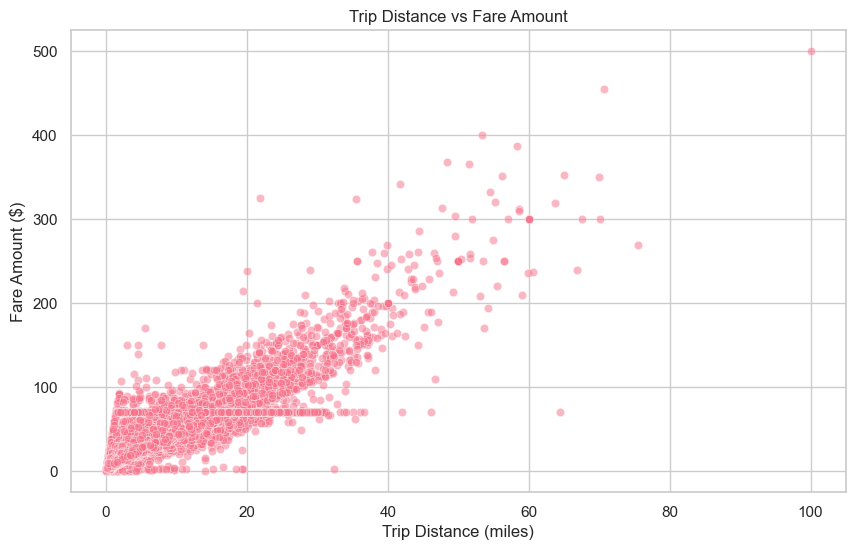

In [110]:
# Show how trip fare is affected by distance

df_nonzero = df_filtered[df_filtered['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')

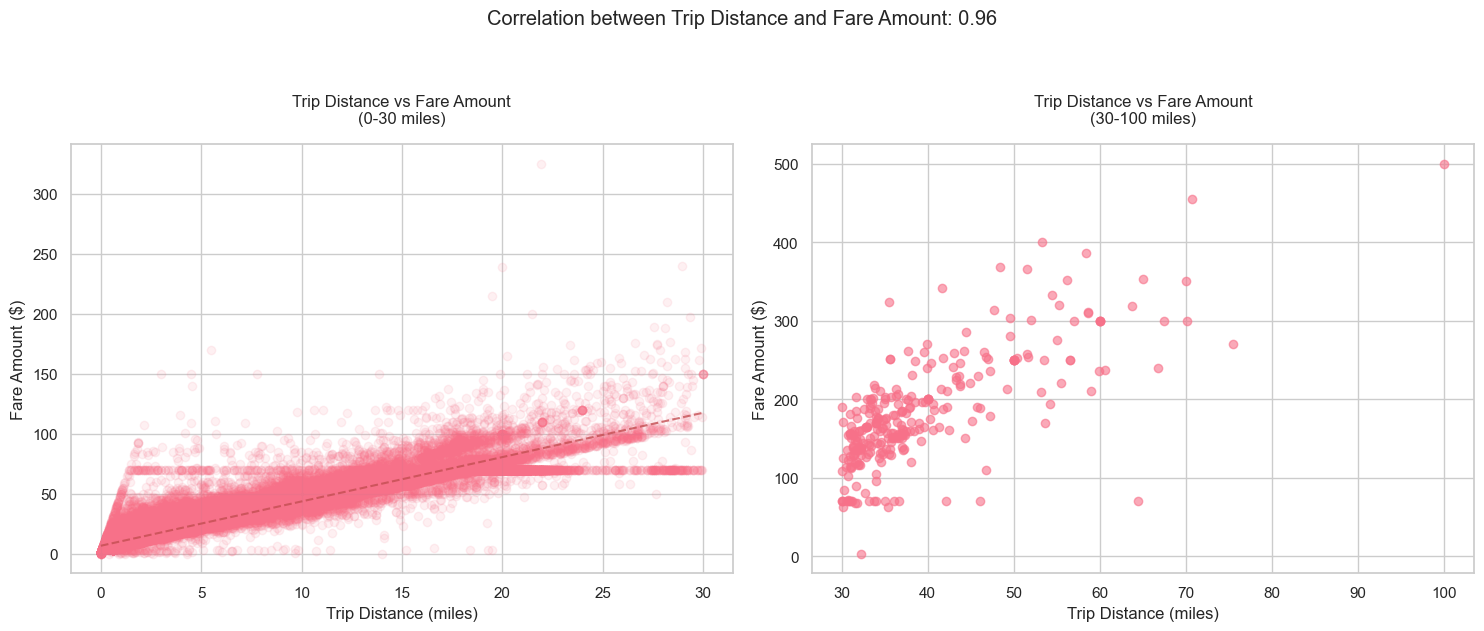


Trip Distance Distribution:
--------------------------------------------------
Trips <= 30 miles: 265105
Trips > 30 miles: 290

Correlation coefficient: 0.9562611017212637


In [116]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Dense region (0-30 miles)
dense_data = df_nonzero[df_nonzero['trip_distance'] <= 30]
ax1.scatter(dense_data['trip_distance'], 
           dense_data['fare_amount'],
           alpha=0.1)  # Higher transparency for dense regions

# Add trend line
z = np.polyfit(dense_data['trip_distance'], dense_data['fare_amount'], 1)
p = np.poly1d(z)
ax1.plot(dense_data['trip_distance'].sort_values(), 
         p(dense_data['trip_distance'].sort_values()), 
         "r--", alpha=0.8)

ax1.set_title('Trip Distance vs Fare Amount\n(0-30 miles)', pad=15)
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Fare Amount ($)')
# hb = ax1.hexbin(dense_data['trip_distance'], 
#                 dense_data['fare_amount'],
#                 gridsize=30, 
#                 cmap='YlOrRd')
# ax1.set_title('Trip Distance vs Fare Amount\n(0-30 miles)', pad=15)
# ax1.set_xlabel('Trip Distance (miles)')
# ax1.set_ylabel('Fare Amount ($)')
# fig.colorbar(hb, ax=ax1, label='Count')

# 2. Extended region (30-100 miles)
sparse_data = df_nonzero[df_nonzero['trip_distance'] > 30]
ax2.scatter(sparse_data['trip_distance'],
            sparse_data['fare_amount'],
            alpha=0.6)
ax2.set_title('Trip Distance vs Fare Amount\n(30-100 miles)', pad=15)
ax2.set_xlabel('Trip Distance (miles)')
ax2.set_ylabel('Fare Amount ($)')

# Calculate and display correlation
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
fig.suptitle(f'Correlation between Trip Distance and Fare Amount: {correlation:.2f}', 
             y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()

# Print some statistics about the distribution
print("\nTrip Distance Distribution:")
print("-" * 50)
print("Trips <= 30 miles:", len(dense_data))
print("Trips > 30 miles:", len(sparse_data))
print("\nCorrelation coefficient:", correlation)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

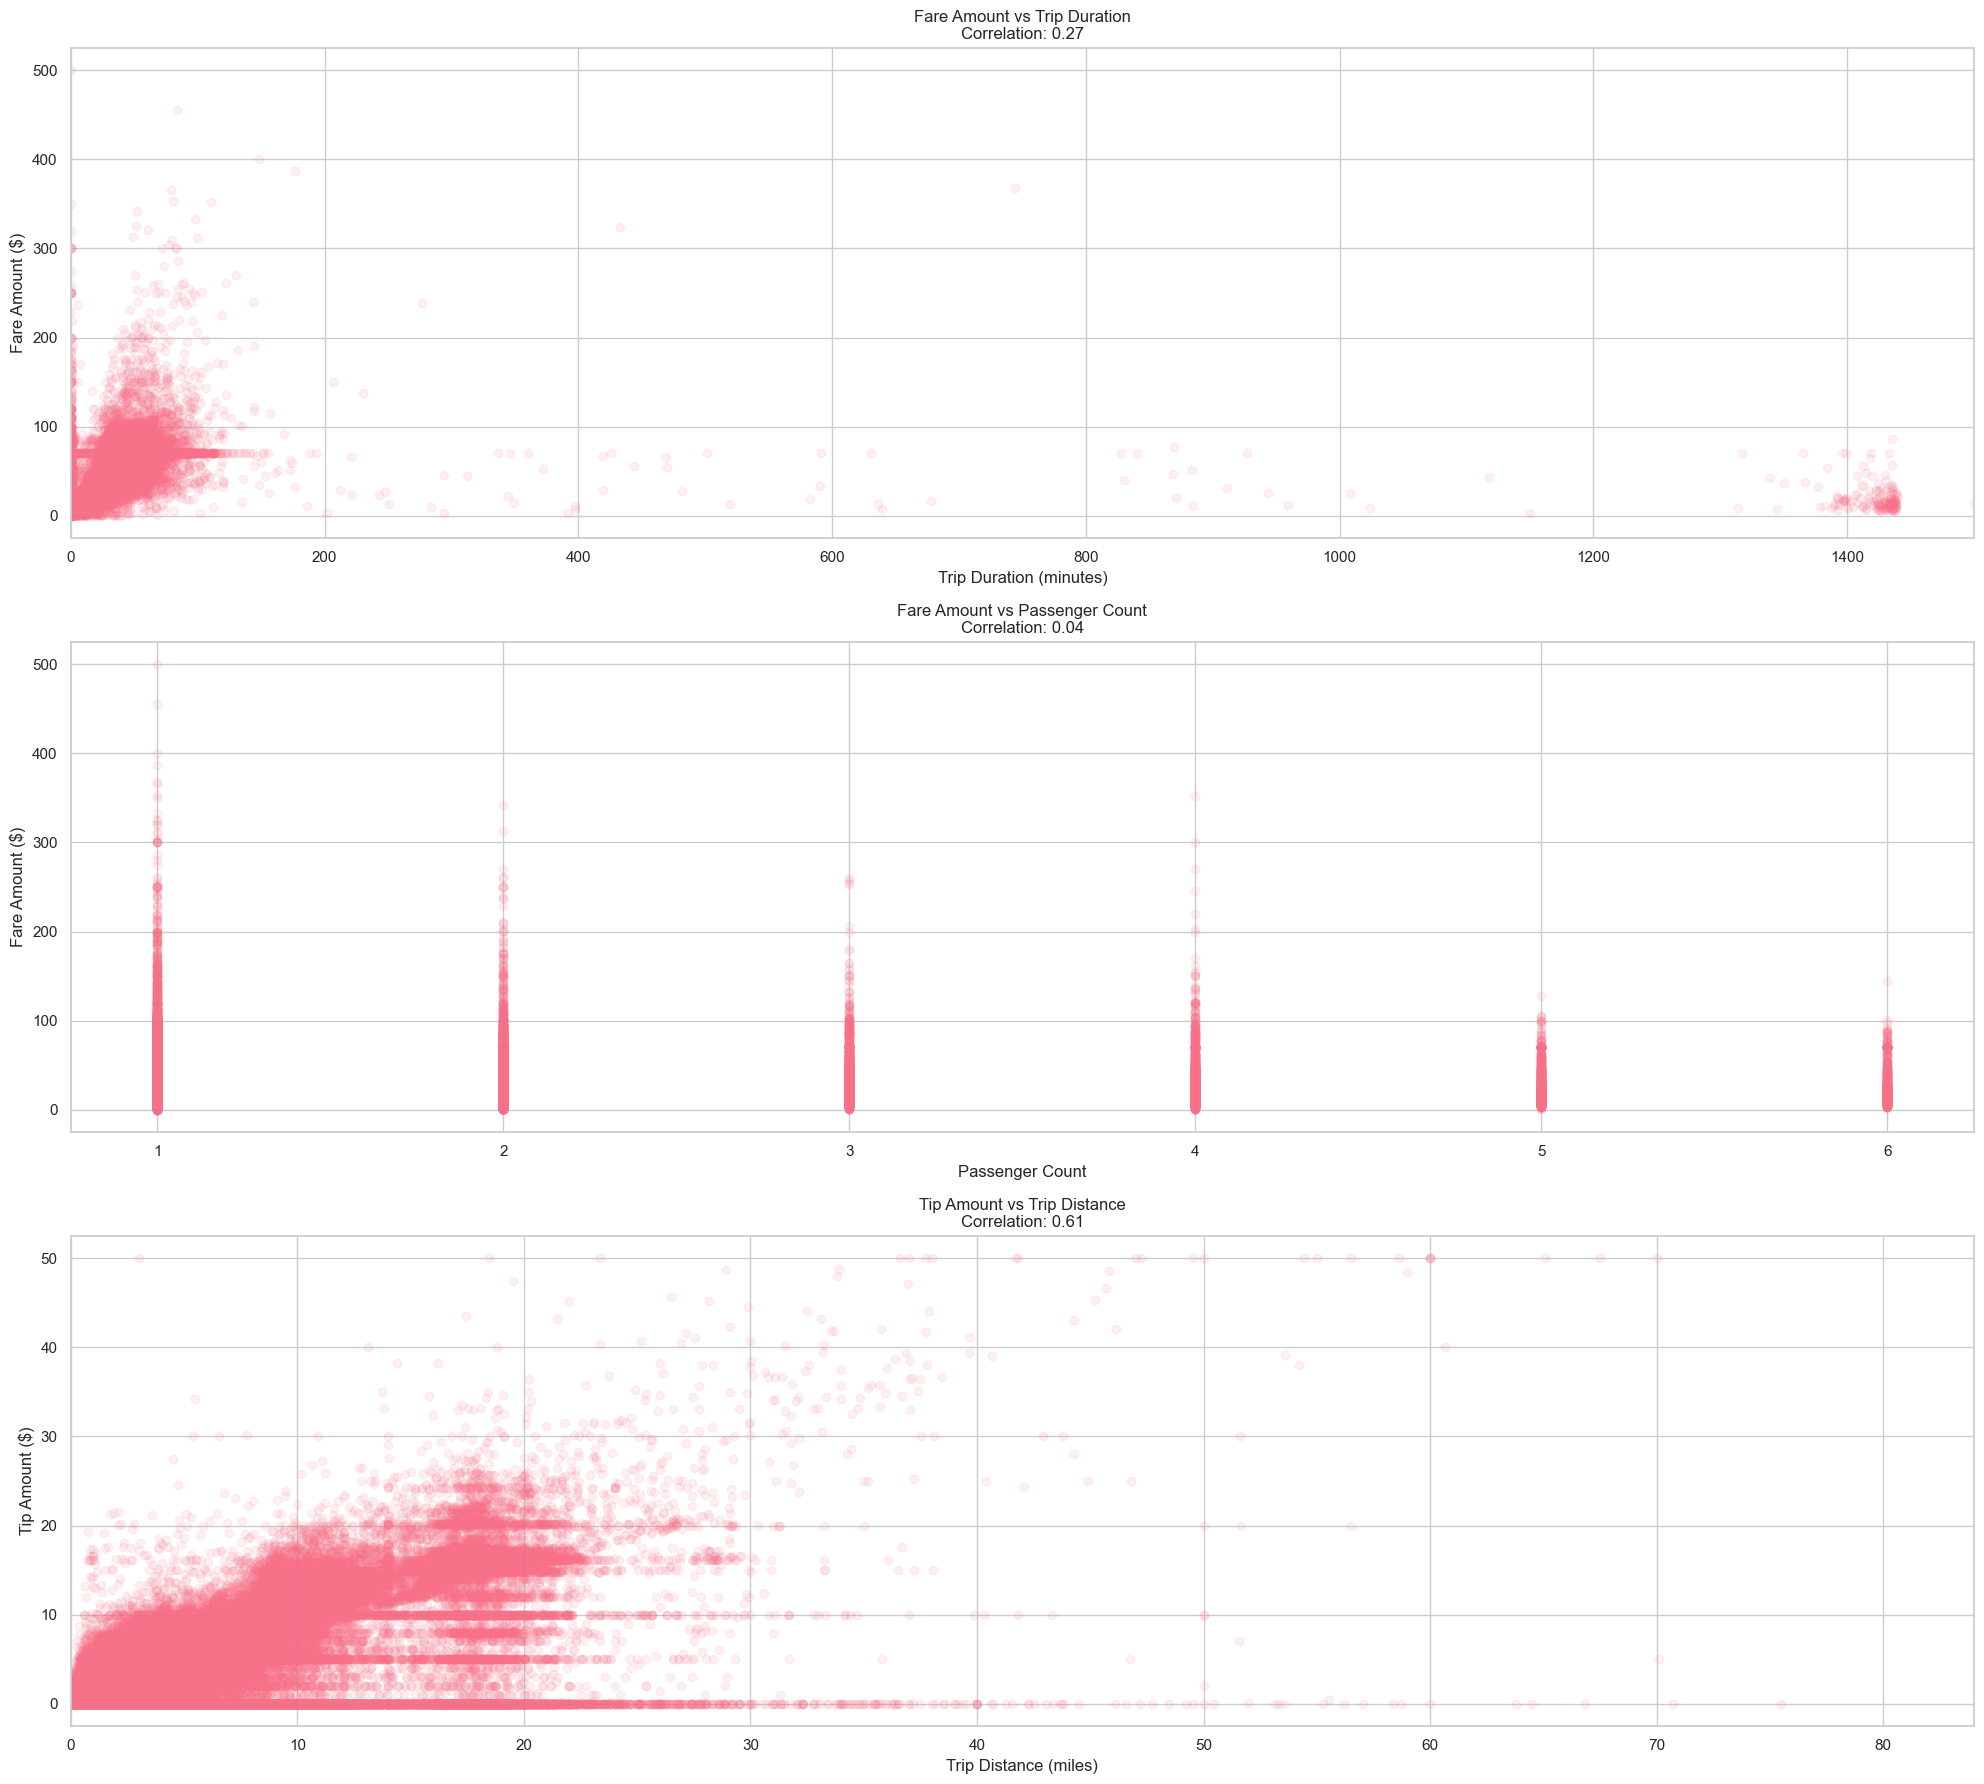


Correlation Analysis:
--------------------------------------------------
1. Fare Amount vs Trip Duration: 0.2719
2. Fare Amount vs Passenger Count: 0.0411
3. Tip Amount vs Trip Distance: 0.6098

Summary Statistics:
--------------------------------------------------

Trip Duration (minutes):
count    265395.000000
mean         17.363668
std          40.268078
min         -52.750000
25%           7.683333
50%          12.700000
75%          20.633333
max        5411.000000
Name: trip_duration, dtype: float64

Passenger Count:
passenger_count
1    206221
2     38664
3      9637
4      5340
5      3300
6      2233
Name: count, dtype: int64


In [133]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df_nonzero['trip_duration'] = (df_nonzero['tpep_dropoff_datetime'] - 
                              df_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 18))

# 1. fare_amount vs trip_duration
corr1 = df_nonzero['fare_amount'].corr(df_nonzero['trip_duration'])
ax1.scatter(df_nonzero['trip_duration'], df_nonzero['fare_amount'], alpha=0.1)
ax1.set_title(f'Fare Amount vs Trip Duration\nCorrelation: {corr1:.2f}')
ax1.set_xlabel('Trip Duration (minutes)')
ax1.set_ylabel('Fare Amount ($)')
ax1.set_xlim(0, 1500)

# 2. fare_amount vs passenger_count
corr2 = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
ax2.scatter(df_nonzero['passenger_count'], df_nonzero['fare_amount'], alpha=0.1)
ax2.set_title(f'Fare Amount vs Passenger Count\nCorrelation: {corr2:.2f}')
ax2.set_xlabel('Passenger Count')
ax2.set_ylabel('Fare Amount ($)')

# 3. tip_amount vs trip_distance
corr3 = df_nonzero['tip_amount'].corr(df_nonzero['trip_distance'])
ax3.scatter(df_nonzero['trip_distance'], df_nonzero['tip_amount'], alpha=0.1)
ax3.set_title(f'Tip Amount vs Trip Distance\nCorrelation: {corr3:.2f}')
ax3.set_xlabel('Trip Distance (miles)')
ax3.set_ylabel('Tip Amount ($)')
ax3.set_xlim(0, 84)

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed correlation analysis
print("\nCorrelation Analysis:")
print("-" * 50)
print(f"1. Fare Amount vs Trip Duration: {corr1:.4f}")
print(f"2. Fare Amount vs Passenger Count: {corr2:.4f}")
print(f"3. Tip Amount vs Trip Distance: {corr3:.4f}")

# Additional statistics
print("\nSummary Statistics:")
print("-" * 50)
print("\nTrip Duration (minutes):")
print(df_nonzero['trip_duration'].describe())
print("\nPassenger Count:")
print(df_nonzero['passenger_count'].value_counts().sort_index())


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
--------------------------------------------------
  Payment Method   Count  Percentage
0    Credit Card  217876       82.09
1           Cash   44419       16.74
2      No Charge    1201        0.45
3        Dispute    1899        0.72


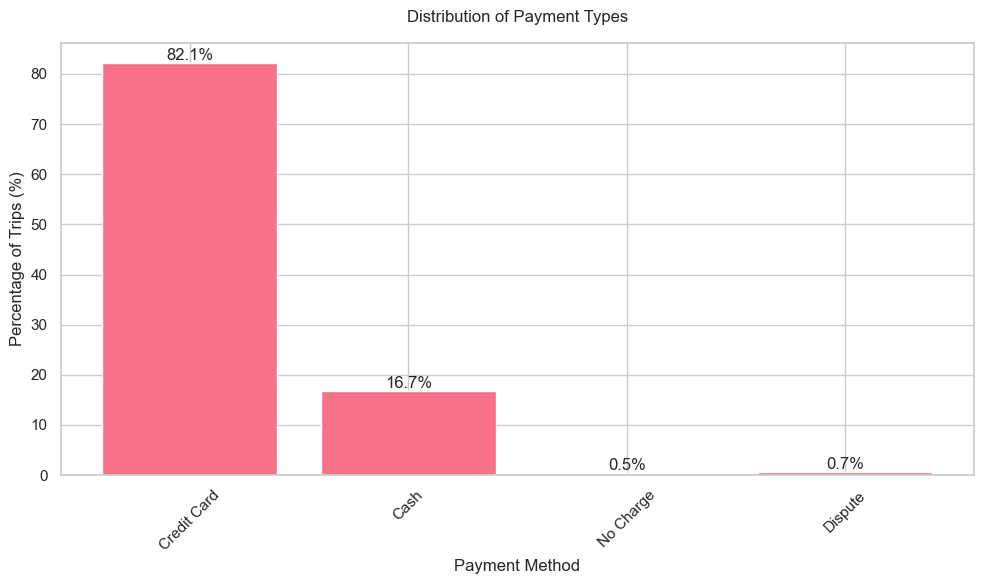


Average Amounts by Payment Type:
--------------------------------------------------
             fare_amount  tip_amount  total_amount
Credit Card        19.82        4.24         29.78
Cash               19.51        0.00         24.93
No Charge          15.68        0.00         21.16
Dispute            19.19        0.00         26.13


In [134]:
# Analyse the distribution of different payment types (payment_type).
# Create payment type distribution analysis
payment_dist = df_nonzero['payment_type'].value_counts().sort_index()

# Create a dictionary for payment type labels
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided'
}

# Create a DataFrame with both counts and percentages
payment_analysis = pd.DataFrame({
    'Payment Method': [payment_labels[i] for i in payment_dist.index],
    'Count': payment_dist.values,
    'Percentage': (payment_dist.values / len(df_nonzero) * 100).round(2)
})

# Print tabular analysis
print("Payment Type Distribution:")
print("-" * 50)
print(payment_analysis)

# Create visualization
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(payment_analysis['Payment Method'], payment_analysis['Percentage'])
plt.title('Distribution of Payment Types', pad=15)
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Trips (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Additional analysis: Average fare and tip by payment type
payment_stats = df_nonzero.groupby('payment_type').agg({
    'fare_amount': 'mean',
    'tip_amount': 'mean',
    'total_amount': 'mean'
}).round(2)

payment_stats.index = [payment_labels[i] for i in payment_stats.index]
print("\nAverage Amounts by Payment Type:")
print("-" * 50)
print(payment_stats)



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [136]:
!pip install geopandas
import geopandas as gpd


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [164]:
os.chdir("E:\\MS-IIITB-LJMU\\EDA - Assignment\\")
os.getcwd()
zones = gpd.read_file("Datasets and Dictionary/taxi_zones/taxi_zones.shp")

print("\nTaxi Zones Data Info:")
print("-" * 50)
print(taxi_zones.info())

# Display first few rows
print("\nFirst few rows of taxi zones data:")
print("-" * 50)
print(taxi_zones.head())

# Check the columns
print("\nColumns in the shapefile:")
print("-" * 50)
print(taxi_zones.columns.tolist())

# Basic statistics about the zones
print("\nZone Statistics:")
print("-" * 50)
print(f"Total number of zones: {len(taxi_zones)}")
print("\nBorough distribution:")
print(taxi_zones['borough'].value_counts())


Taxi Zones Data Info:
--------------------------------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None

First few rows of taxi zones data:
--------------------------------------------------
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  All

In [166]:

zones.head(20)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0          1    0.116357    0.000782           Newark Airport           1   
1          2    0.433470    0.004866              Jamaica Bay           2   
2          3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3          4    0.043567    0.000112            Alphabet City           4   
4          5    0.092146    0.000498            Arden Heights           5   
5          6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6          7    0.107417    0.000390                  Astoria           7   
7          8    0.027591    0.000027             Astoria Park           8   
8          9    0.099784    0.000338               Auburndale           9   
9         10    0.099839    0.000436             Baisley Park          10   
10        11    0.079211    0.000265               Bath Beach          11   
11        12    0.036661    0.000042             Battery Park          12   
12        13    0.050281    0.000149        Battery Park City          13   
13        14    0.175214    0.001382                Bay Ridge          14   
14        15    0.144336    0.000925  Bay Terrace/Fort Totten          15   
15        16    0.141292    0.000872                  Bayside          16   
16        17    0.093523    0.000323                  Bedford          17   
17        18    0.069800    0.000149             Bedford Park          18   
18        19    0.101825    0.000547                Bellerose          19   
19        20    0.051440    0.000135                  Belmont          20   

          borough                                           geometry  
0             EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1          Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2           Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3       Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4   Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
5   Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...  
6          Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...  
7          Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...  
8          Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...  
9          Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...  
10       Brooklyn  POLYGON ((983945.076 158978.174, 984160.158 15...  
11      Manhattan  POLYGON ((979908.772 196066.565, 979980.852 19...  
12      Manhattan  POLYGON ((980801.31 201248.869, 980697.386 200...  
13       Brooklyn  POLYGON ((974794.238 174019.157, 975135.579 17...  
14         Queens  POLYGON ((1045882.129 229577.493, 1045886.158 ...  
15         Queens  POLYGON ((1048344.039 223210.621, 1048409.575 ...  
16       Brooklyn  POLYGON ((1000036.904 194829.434, 1000276.454 ...  
17          Bronx  POLYGON ((1016019.237 254945.129, 1015798.748 ...  
18         Queens  POLYGON ((1060888.899 212784.64, 1061115.169 2...  
19          Bronx  POLYGON ((1016371.834 254183.401, 1016392.376 ...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [167]:
print(zones.info())
zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [168]:
# Merge zones and trip records using locationID and PULocationID

# First, let's rename LocationID in taxi_zones to match with PULocationID
zones_pickup = taxi_zones.copy()
zones_pickup = zones_pickup.rename(columns={'LocationID': 'PULocationID'})

# Select necessary columns from zones data to keep the merged dataset manageable
zones_pickup = zones_pickup[['PULocationID', 'zone', 'borough', 'geometry']]

# Rename columns to indicate they're for pickup
zones_pickup = zones_pickup.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
})

# Merge with trip data
df_with_zones = df_nonzero.merge(zones_pickup, on='PULocationID', how='left')

# Verify the merge
print("Merged Dataset Info:")
print("-" * 50)
print(df_with_zones.info())

# Check if we lost any data in the merge
print("\nMerge Statistics:")
print("-" * 50)
print(f"Original trips: {len(df_nonzero)}")
print(f"Merged trips: {len(df_with_zones)}")
print(f"Trips with missing zone info: {df_with_zones['pickup_zone'].isna().sum()}")

# Display sample of merged data
print("\nSample of Merged Data:")
print("-" * 50)
print(df_with_zones[['PULocationID', 'pickup_zone', 'pickup_borough', 'fare_amount']].head())

# Quick summary of pickups by borough
print("\nPickups by Borough:")
print("-" * 50)
print(df_with_zones['pickup_borough'].value_counts())

Merged Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265416 entries, 0 to 265415
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265416 non-null  int64         
 1   tpep_pickup_datetime   265416 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265416 non-null  datetime64[us]
 3   passenger_count        265416 non-null  int64         
 4   trip_distance          265416 non-null  float64       
 5   RatecodeID             265416 non-null  int64         
 6   PULocationID           265416 non-null  int64         
 7   DOLocationID           265416 non-null  int64         
 8   payment_type           265416 non-null  int64         
 9   fare_amount            265416 non-null  float64       
 10  extra                  265416 non-null  float64       
 11  mta_tax                265416 no

In [169]:
# Prepare zones data for dropoff locations
zones_dropoff = taxi_zones.copy()
zones_dropoff = zones_dropoff.rename(columns={
    'LocationID': 'DOLocationID',
    'zone': 'dropoff_zone',
    'borough': 'dropoff_borough'
})

# Select necessary columns
zones_dropoff = zones_dropoff[['DOLocationID', 'dropoff_zone', 'dropoff_borough']]

# Merge with our existing dataframe
df_with_zones = df_with_zones.merge(zones_dropoff, on='DOLocationID', how='left')

# Verify the merge
print("Final Dataset Info:")
print("-" * 50)
print(df_with_zones.info())

# Check pickup-dropoff borough patterns
print("\nTop 10 Pickup-Dropoff Borough Patterns:")
print("-" * 50)
borough_patterns = df_with_zones.groupby(['pickup_borough', 'dropoff_borough']).size()\
    .sort_values(ascending=False).head(10)
print(borough_patterns)

# Calculate percentage of trips within same borough
same_borough = df_with_zones[df_with_zones['pickup_borough'] == df_with_zones['dropoff_borough']]
print("\nTrips within same borough:")
print("-" * 50)
print(f"Number of trips: {len(same_borough)}")
print(f"Percentage: {(len(same_borough)/len(df_with_zones))*100:.2f}%")

Final Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265501 entries, 0 to 265500
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265501 non-null  int64         
 1   tpep_pickup_datetime   265501 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265501 non-null  datetime64[us]
 3   passenger_count        265501 non-null  int64         
 4   trip_distance          265501 non-null  float64       
 5   RatecodeID             265501 non-null  int64         
 6   PULocationID           265501 non-null  int64         
 7   DOLocationID           265501 non-null  int64         
 8   payment_type           265501 non-null  int64         
 9   fare_amount            265501 non-null  float64       
 10  extra                  265501 non-null  float64       
 11  mta_tax                265501 non

In [170]:
# Calculate percentages for top patterns
total_trips = borough_patterns.sum()
borough_patterns_pct = (borough_patterns / total_trips * 100).round(2)

print("Top Borough-to-Borough Patterns:")
print("-" * 50)
for (pu, do), count in borough_patterns.items():
    percentage = borough_patterns_pct[pu, do]
    print(f"{pu} → {do}: {count:,} trips ({percentage}%)")

# Analyze Manhattan-centric patterns
manhattan_pickups = df_with_zones[df_with_zones['pickup_borough'] == 'Manhattan']
manhattan_dropoffs = df_with_zones[df_with_zones['dropoff_borough'] == 'Manhattan']

print("\nManhattan Pattern Analysis:")
print("-" * 50)
print(f"Trips starting in Manhattan: {len(manhattan_pickups):,} ({len(manhattan_pickups)/len(df_with_zones)*100:.2f}%)")
print(f"Trips ending in Manhattan: {len(manhattan_dropoffs):,} ({len(manhattan_dropoffs)/len(df_with_zones)*100:.2f}%)")

# Analyze time patterns for inter-borough trips
df_with_zones['inter_borough'] = df_with_zones['pickup_borough'] != df_with_zones['dropoff_borough']
inter_borough_time = df_with_zones[df_with_zones['inter_borough']].groupby('hour')['inter_borough'].count()

print("\nInter-borough Trip Patterns by Hour:")
print("-" * 50)
print(inter_borough_time.sort_values(ascending=False).head())

Top Borough-to-Borough Patterns:
--------------------------------------------------
Manhattan → Manhattan: 218,570 trips (84.16%)
Queens → Manhattan: 14,720 trips (5.67%)
Manhattan → Queens: 8,088 trips (3.11%)
Queens → Queens: 5,906 trips (2.27%)
Manhattan → Brooklyn: 5,552 trips (2.14%)
Queens → Brooklyn: 3,806 trips (1.47%)
Brooklyn → Brooklyn: 964 trips (0.37%)
Manhattan → Bronx: 739 trips (0.28%)
Manhattan → EWR: 701 trips (0.27%)
Brooklyn → Manhattan: 667 trips (0.26%)

Manhattan Pattern Analysis:
--------------------------------------------------
Trips starting in Manhattan: 234,592 (88.36%)
Trips ending in Manhattan: 234,492 (88.32%)

Inter-borough Trip Patterns by Hour:
--------------------------------------------------
hour
14    2530
15    2524
16    2420
17    2338
22    2328
Name: inter_borough, dtype: int64


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [171]:
# Group data by location and calculate the number of trips
# Group by PULocationID (Pickups)
pickup_counts = df_with_zones.groupby(['PULocationID', 'pickup_zone', 'pickup_borough'])\
    .size().reset_index(name='pickup_count')
pickup_counts = pickup_counts.sort_values('pickup_count', ascending=False)

# Group by DOLocationID (Dropoffs)
dropoff_counts = df_with_zones.groupby(['DOLocationID', 'dropoff_zone', 'dropoff_borough'])\
    .size().reset_index(name='dropoff_count')
dropoff_counts = dropoff_counts.sort_values('dropoff_count', ascending=False)

# Display top 15 pickup locations
print("Top 15 Pickup Locations:")
print("-" * 70)
print(pickup_counts.head(15).to_string(index=False))

# Display top 15 dropoff locations
print("\nTop 15 Dropoff Locations:")
print("-" * 70)
print(dropoff_counts.head(15).to_string(index=False))

# Summary statistics
print("\nLocation Summary Statistics:")
print("-" * 70)
print(f"Total unique pickup locations: {len(pickup_counts)}")
print(f"Total unique dropoff locations: {len(dropoff_counts)}")

# Calculate locations with zero pickups/dropoffs
all_locations = set(taxi_zones['LocationID'])
pickup_locations = set(pickup_counts['PULocationID'])
dropoff_locations = set(dropoff_counts['DOLocationID'])

print("\nUnused Locations:")
print("-" * 70)
print(f"Locations with no pickups: {len(all_locations - pickup_locations)}")
print(f"Locations with no dropoffs: {len(all_locations - dropoff_locations)}")


Top 15 Pickup Locations:
----------------------------------------------------------------------
 PULocationID                  pickup_zone pickup_borough  pickup_count
          132                  JFK Airport         Queens         13638
          237        Upper East Side South      Manhattan         12341
          161               Midtown Center      Manhattan         12269
          236        Upper East Side North      Manhattan         11083
          162                 Midtown East      Manhattan          9425
          138            LaGuardia Airport         Queens          9018
          186 Penn Station/Madison Sq West      Manhattan          8871
          230    Times Sq/Theatre District      Manhattan          8741
          142          Lincoln Square East      Manhattan          8628
          170                  Murray Hill      Manhattan          7790
          163                Midtown North      Manhattan          7580
          239        Upper West Side Sou

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [172]:
# Merge trip counts back to the zones GeoDataFrame
# Create a copy of the taxi_zones GeoDataFrame
zones_with_trips = taxi_zones.copy()

# Merge pickup counts
zones_with_trips = zones_with_trips.merge(
    pickup_counts[['PULocationID', 'pickup_count']], 
    left_on='LocationID', 
    right_on='PULocationID', 
    how='left'
)

# Merge dropoff counts
zones_with_trips = zones_with_trips.merge(
    dropoff_counts[['DOLocationID', 'dropoff_count']], 
    left_on='LocationID', 
    right_on='DOLocationID', 
    how='left'
)

# Fill NaN values with 0 for zones with no trips
zones_with_trips['pickup_count'] = zones_with_trips['pickup_count'].fillna(0)
zones_with_trips['dropoff_count'] = zones_with_trips['dropoff_count'].fillna(0)

# Add total trips column
zones_with_trips['total_trips'] = zones_with_trips['pickup_count'] + zones_with_trips['dropoff_count']

# Basic statistics of the merged data
print("Zone Trip Statistics:")
print("-" * 70)
print("\nPickup Statistics:")
print(zones_with_trips['pickup_count'].describe())
print("\nDropoff Statistics:")
print(zones_with_trips['dropoff_count'].describe())
print("\nTotal Trips Statistics:")
print(zones_with_trips['total_trips'].describe())

# Show top 10 zones by total trips
print("\nTop 10 Zones by Total Trip Volume:")
print("-" * 70)
print(zones_with_trips.nlargest(10, 'total_trips')[['zone', 'borough', 'pickup_count', 'dropoff_count', 'total_trips']])

# Verify the merge
print("\nMerge Verification:")
print("-" * 70)
print(f"Total zones: {len(zones_with_trips)}")
print(f"Zones with trips: {len(zones_with_trips[zones_with_trips['total_trips'] > 0])}")
print(f"Zones with no trips: {len(zones_with_trips[zones_with_trips['total_trips'] == 0])}")



Zone Trip Statistics:
----------------------------------------------------------------------

Pickup Statistics:
count      263.000000
mean       999.577947
std       2444.154158
min          0.000000
25%          5.000000
50%         18.000000
75%        140.500000
max      13638.000000
Name: pickup_count, dtype: float64

Dropoff Statistics:
count      263.000000
mean       995.627376
std       2090.821382
min          0.000000
25%         26.500000
50%         73.000000
75%        605.000000
max      11785.000000
Name: dropoff_count, dtype: float64

Total Trips Statistics:
count      263.000000
mean      1995.205323
std       4467.543930
min          0.000000
25%         35.500000
50%         85.000000
75%        746.000000
max      23346.000000
Name: total_trips, dtype: float64

Top 10 Zones by Total Trip Volume:
----------------------------------------------------------------------
                             zone    borough  pickup_count  dropoff_count  \
236         Upper East S

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

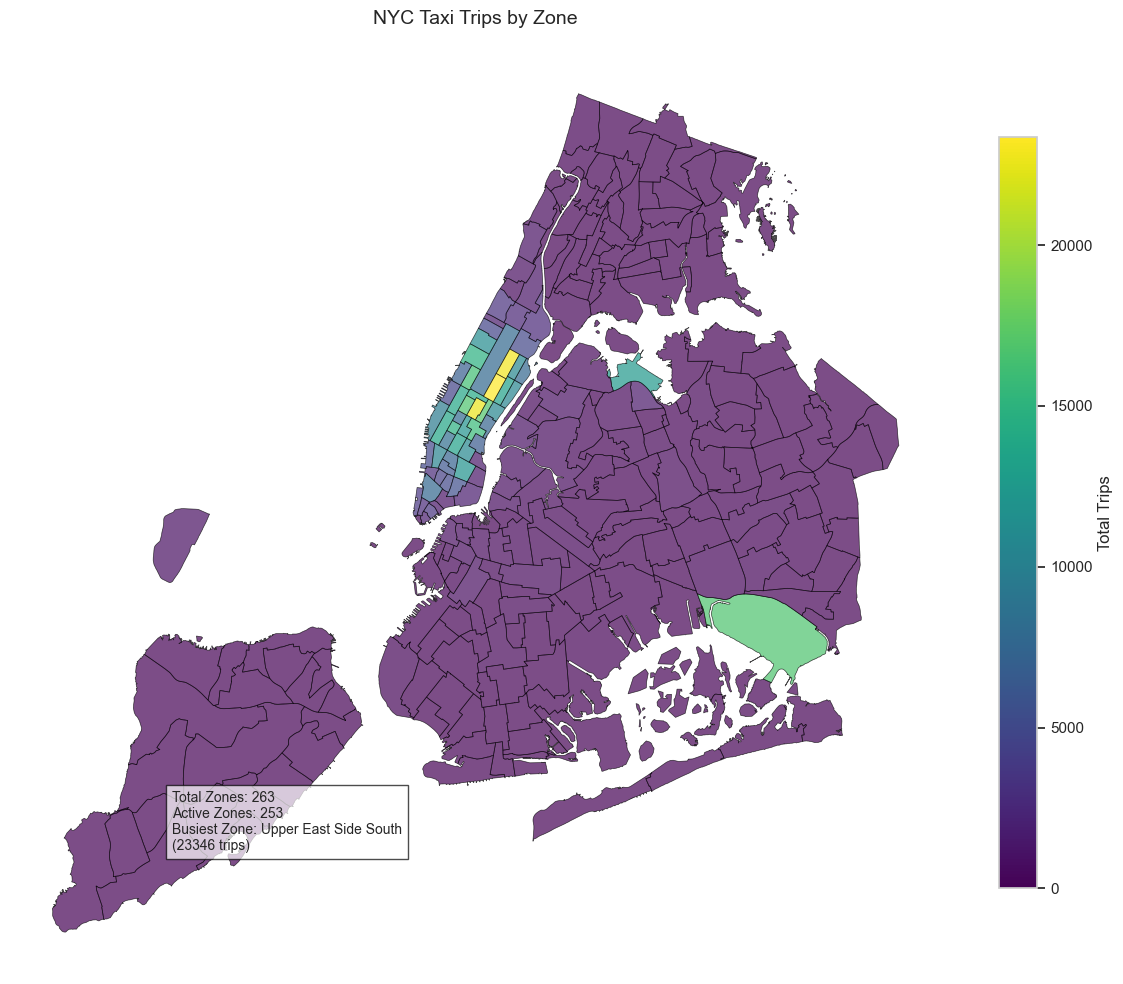

In [219]:
# Define figure and axis

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create the choropleth map
zones_with_trips.plot(
    column='total_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Total Trips',
        'orientation': 'vertical',
        'shrink': 0.8
    },
    missing_kwds={'color': 'lightgrey'},
    cmap='viridis',  
    edgecolor='black',
    linewidth=0.5,
    alpha=0.7
)

# Customize the map
plt.title('NYC Taxi Trips by Zone', pad=20, fontsize=14)

# Remove axes
ax.set_axis_off()

# Add text annotation for context
plt.figtext(
    0.15, 0.15,
    f"Total Zones: {len(zones_with_trips)}\n"
    f"Active Zones: {len(zones_with_trips[zones_with_trips['total_trips'] > 0])}\n"
    f"Busiest Zone: {zones_with_trips.loc[zones_with_trips['total_trips'].idxmax(), 'zone']}\n"
    f"({int(zones_with_trips['total_trips'].max())} trips)",
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
    fontsize=10
)

plt.tight_layout()
plt.show()

# Create a second map showing pickup-dropoff ratio
zones_with_trips['pickup_dropoff_ratio'] = (
    zones_with_trips['pickup_count'] / zones_with_trips['dropoff_count']
).replace([np.inf, -np.inf], np.nan)

# Create second figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot pickup-dropoff ratio
zones_with_trips.plot(
    column='pickup_dropoff_ratio',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Pickup/Dropoff Ratio',
        'orientation': 'vertical',
        'shrink': 0.8
    },
    missing_kwds={'color': 'lightgrey'},
    cmap='PuOr',  
    edgecolor='black',
    linewidth=0.5,
    alpha=0.7,
    vmin=0.5,
    vmax=1.5
)

# Customize the second map
plt.title('NYC Taxi Pickup to Dropoff Ratio by Zone', pad=20, fontsize=14)
ax.set_axis_off()

plt.figtext(
    0.15, 0.15,
    "Purple: More dropoffs than pickups\nOrange: More pickups than dropoffs\n" +
    "White: Balanced pickup/dropoff ratio\n\n" +
    f"Median Ratio: {zones_with_trips['pickup_dropoff_ratio'].median():.2f}",
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
    fontsize=10
)

plt.tight_layout()
plt.show()



In [174]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones by total trips and create a readable display
sorted_zones = zones_with_trips[['zone', 'borough', 'pickup_count', 'dropoff_count', 'total_trips']]\
    .sort_values('total_trips', ascending=False)\
    .reset_index(drop=True)

# Format the numeric columns
sorted_zones_formatted = sorted_zones.copy()
sorted_zones_formatted[['pickup_count', 'dropoff_count', 'total_trips']] = \
    sorted_zones_formatted[['pickup_count', 'dropoff_count', 'total_trips']].round(0).astype(int)

# Display with proper formatting
print("Zones Sorted by Total Trip Volume:")
print("-" * 100)
print(f"{'#':4} {'Zone':35} {'Borough':15} {'Pickups':10} {'Dropoffs':10} {'Total':10}")
print("-" * 100)

for idx, row in sorted_zones_formatted.iterrows():
    print(f"{idx:3}. {row['zone']:35} {row['borough']:15} {row['pickup_count']:10,d} "
          f"{row['dropoff_count']:10,d} {row['total_trips']:10,d}")

# Display summary statistics
print("\nSummary Statistics:")
print("-" * 50)
print(f"Total Zones: {len(sorted_zones)}")
print(f"Active Zones (with trips): {len(sorted_zones[sorted_zones['total_trips'] > 0])}")
print(f"Inactive Zones: {len(sorted_zones[sorted_zones['total_trips'] == 0])}")
print(f"\nTotal Trips: {sorted_zones['total_trips'].sum():,}")
print(f"Average Trips per Zone: {sorted_zones['total_trips'].mean():,.1f}")
print(f"Median Trips per Zone: {sorted_zones['total_trips'].median():,.1f}")


Zones Sorted by Total Trip Volume:
----------------------------------------------------------------------------------------------------
#    Zone                                Borough         Pickups    Dropoffs   Total     
----------------------------------------------------------------------------------------------------
  0. Upper East Side South               Manhattan           12,341     11,005     23,346
  1. Upper East Side North               Manhattan           11,083     11,785     22,868
  2. Midtown Center                      Manhattan           12,269     10,291     22,560
  3. Midtown East                        Manhattan            9,425      7,500     16,925
  4. Times Sq/Theatre District           Manhattan            8,741      8,029     16,770
  5. JFK Airport                         Queens              13,638      3,123     16,761
  6. Lincoln Square East                 Manhattan            8,628      7,464     16,092
  7. Murray Hill                         Ma

In [175]:
# Create figure with larger size for better readability
plt.figure(figsize=(15, 10))

# Get top 20 zones
top_20_zones = sorted_zones.head(20)

# Create stacked bar chart
bars = plt.bar(range(len(top_20_zones)), top_20_zones['total_trips'], 
               alpha=0.8, label='Total Trips')

# Customize the plot
plt.title('Top 20 NYC Taxi Zones by Total Trip Volume', pad=20, fontsize=14)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(range(len(top_20_zones)), 
           [f"{zone}\n({borough})" for zone, borough in zip(top_20_zones['zone'], top_20_zones['borough'])],
           rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Create a second visualization showing pickup vs dropoff distribution
plt.figure(figsize=(15, 10))

# Create grouped bar chart for pickups and dropoffs
x = range(len(top_20_zones))
width = 0.35

plt.bar(x, top_20_zones['pickup_count'], width, 
        label='Pickups', color='skyblue', alpha=0.8)
plt.bar([i + width for i in x], top_20_zones['dropoff_count'], width,
        label='Dropoffs', color='lightcoral', alpha=0.8)

# Customize the plot
plt.title('Top 20 NYC Taxi Zones: Pickup vs Dropoff Distribution', pad=20, fontsize=14)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# Adjust x-axis labels
plt.xticks([i + width/2 for i in x],
           [f"{zone}\n({borough})" for zone, borough in zip(top_20_zones['zone'], top_20_zones['borough'])],
           rotation=45, ha='right')

# Add legend
plt.legend()

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [220]:
# Calculate speed for each trip (miles per hour)
df_with_zones['speed'] = (df_with_zones['trip_distance'] / 
                         (df_with_zones['trip_duration']/60))  # Convert minutes to hours

# Remove infinite and unreasonable speeds (e.g., speed > 100 mph or < 0 mph)
df_with_zones['speed'] = df_with_zones['speed'].clip(0, 100)

# Create route identifier
df_with_zones['route'] = df_with_zones['pickup_zone'] + ' to ' + df_with_zones['dropoff_zone']

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# 1. Average Speed by Hour (same as before)
hourly_speeds = df_with_zones.groupby('hour')['speed'].mean()
ax1.plot(hourly_speeds.index, hourly_speeds.values, marker='o', linewidth=2)
ax1.set_title('Average Speed by Hour of Day', pad=15, fontsize=12)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed (mph)')
ax1.grid(True, alpha=0.3)

# Add peak/off-peak highlighting
ax1.axvspan(7, 10, alpha=0.2, color='red', label='Morning Trips')
ax1.axvspan(11, 14, alpha=0.2, color='blue', label='Midday Trips')
ax1.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Trips')
ax1.legend()

# 2. Top 10 Slowest Routes (same as before)
slowest_routes = significant_routes.groupby('route')[['speed', 'PULocationID']]\
    .agg({'speed': 'mean', 'PULocationID': 'sum'})\
    .sort_values('speed').head(10)

bars = ax2.barh(range(len(slowest_routes)), slowest_routes['speed'])
ax2.set_yticks(range(len(slowest_routes)))
ax2.set_yticklabels(slowest_routes.index, fontsize=8)
ax2.set_title('Top 10 Slowest Routes', pad=15, fontsize=12)
ax2.set_xlabel('Average Speed (mph)')

# Add trip count annotations
for i, bar in enumerate(bars):
    trips = slowest_routes['PULocationID'].iloc[i]
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f' {trips} trips', va='center')

# 3. Speed vs Distance (Fixed version)
# Filter data first
distance_limit = np.percentile(df_with_zones['trip_distance'], 99)
speed_limit = np.percentile(df_with_zones['speed'], 99)
filtered_df = df_with_zones[
    (df_with_zones['trip_distance'] <= distance_limit) & 
    (df_with_zones['speed'] <= speed_limit)
]

ax3.scatter(filtered_df['trip_distance'], 
           filtered_df['speed'],
           alpha=0.1, s=1)
ax3.set_title('Speed vs Distance (99th percentile)', pad=15, fontsize=12)
ax3.set_xlabel('Trip Distance (miles)')
ax3.set_ylabel('Speed (mph)')
ax3.grid(True, alpha=0.3)

# 4. Speed Distribution by Time Period
df_with_zones['time_period'] = pd.cut(df_with_zones['hour'],
                                     bins=[-1, 6, 10, 15, 19, 23],
                                     labels=['Night (0-6)', 'Morning Peak (7-10)',
                                            'Midday (11-15)', 'Evening Peak (16-19)',
                                            'Evening (20-23)'])

# Filter extreme speeds for boxplot
df_box = df_with_zones[df_with_zones['speed'] <= speed_limit]

sns.boxplot(data=df_box, x='time_period', y='speed', ax=ax4)
ax4.set_title('Speed Distribution by Time Period', pad=15, fontsize=12)
ax4.set_xlabel('Time Period')
ax4.set_ylabel('Speed (mph)')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylim(0, speed_limit)

plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

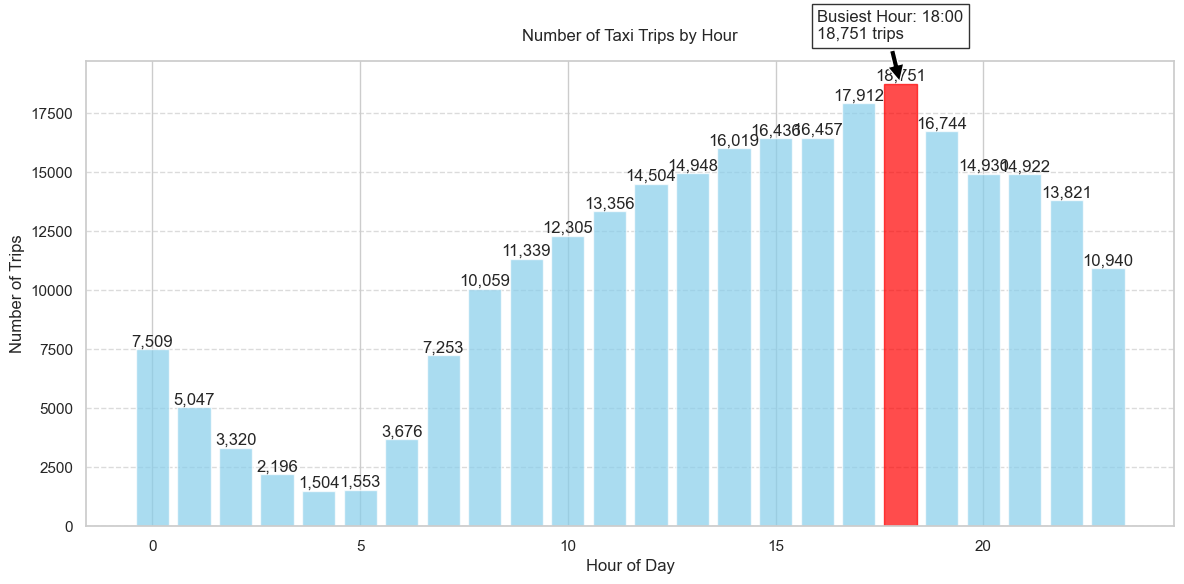


Hourly Trip Analysis:
--------------------------------------------------
Busiest Hour: 18:00 with 18,751 trips

Top 5 Busiest Hours:
 hour  trip_count
   18       18751
   17       17912
   19       16744
   16       16457
   15       16436

Peak Hours (7-9 AM, 4-6 PM) account for 30.8% of daily trips


In [180]:
# Visualise the number of trips per hour and find the busiest hour
# Calculate hourly trips and sort by hour
hourly_trips = df_with_zones.groupby('hour').size().reset_index(name='trip_count')

# Create the visualization
plt.figure(figsize=(12, 6))

# Bar plot of trips by hour
bars = plt.bar(hourly_trips['hour'], hourly_trips['trip_count'], 
               color='skyblue', alpha=0.7)

# Highlight the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
bars[int(busiest_hour['hour'])].set_color('red')

# Customize the plot
plt.title('Number of Taxi Trips by Hour', pad=15, fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add annotation for busiest hour
plt.annotate(f'Busiest Hour: {int(busiest_hour["hour"]):02d}:00\n{int(busiest_hour["trip_count"]):,} trips',
            xy=(busiest_hour['hour'], busiest_hour['trip_count']),
            xytext=(busiest_hour['hour']-2, busiest_hour['trip_count']*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nHourly Trip Analysis:")
print("-" * 50)
print(f"Busiest Hour: {int(busiest_hour['hour']):02d}:00 with {int(busiest_hour['trip_count']):,} trips")
print("\nTop 5 Busiest Hours:")
print(hourly_trips.nlargest(5, 'trip_count').to_string(index=False))

# Calculate peak vs off-peak statistics
peak_hours = [7,8,9,16,17,18] # Define peak hours
peak_trips = hourly_trips[hourly_trips['hour'].isin(peak_hours)]['trip_count'].sum()
total_trips = hourly_trips['trip_count'].sum()

print(f"\nPeak Hours (7-9 AM, 4-6 PM) account for {peak_trips/total_trips*100:.1f}% of daily trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [182]:
# Scale up the number of trips

# Define sampling fraction
sample_fraction = 0.01

# Calculate actual trips for top 5 hours
hourly_trips['actual_trips'] = (hourly_trips['trip_count'] / sample_fraction).round(0)

# Create visualization comparing sampled vs actual trips for top 5 hours
top_5_hours = hourly_trips.nlargest(5, 'trip_count')

# Create figure
plt.figure(figsize=(12, 6))

# Create grouped bar chart
x = np.arange(len(top_5_hours))
width = 0.35

# Plot bars
plt.bar(x - width/2, top_5_hours['trip_count'], width, 
        label='Sampled Trips', color='skyblue')
plt.bar(x + width/2, top_5_hours['actual_trips'], width, 
        label='Estimated Actual Trips', color='lightcoral')

# Customize plot
plt.title('Sampled vs Actual Trips for 5 Busiest Hours', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(x, [f'{int(hour):02d}:00' for hour in top_5_hours['hour']])
plt.legend()

# Add value labels
for i in x:
    # Sampled trips
    plt.text(i - width/2, top_5_hours['trip_count'].iloc[i],
             f'{int(top_5_hours["trip_count"].iloc[i]):,}',
             ha='center', va='bottom')
    # Actual trips
    plt.text(i + width/2, top_5_hours['actual_trips'].iloc[i],
             f'{int(top_5_hours["actual_trips"].iloc[i]):,}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print detailed analysis
print("Actual Trip Estimates for Busiest Hours:")
print("-" * 60)
print("Hour    Sampled Trips    Actual Trips")
print("-" * 60)
for _, row in top_5_hours.iterrows():
    print(f"{int(row['hour']):02d}:00    {int(row['trip_count']):7,}         {int(row['actual_trips']):,}")

Actual Trip Estimates for Busiest Hours:
------------------------------------------------------------
Hour    Sampled Trips    Actual Trips
------------------------------------------------------------
18:00     18,751         1,875,100
17:00     17,912         1,791,200
19:00     16,744         1,674,400
16:00     16,457         1,645,700
15:00     16,436         1,643,600


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [221]:
# Compare traffic trends for the week days and weekends
# Create weekday/weekend indicator
df_with_zones['is_weekend'] = df_with_zones['day_of_week'].isin(['Saturday', 'Sunday'])

# Calculate hourly trips for weekdays and weekends
hourly_patterns = df_with_zones.groupby(['hour', 'is_weekend']).size().unstack()
hourly_patterns.columns = ['Weekday', 'Weekend']

# Calculate average trips per day (divide weekday by 5 and weekend by 2)
hourly_patterns['Weekday'] = hourly_patterns['Weekday'] / 5
hourly_patterns['Weekend'] = hourly_patterns['Weekend'] / 2

# Create visualization
plt.figure(figsize=(12, 6))

# Plot lines for weekday and weekend
plt.plot(hourly_patterns.index, hourly_patterns['Weekday'], 
         label='Weekday Average', color='blue', marker='o')
plt.plot(hourly_patterns.index, hourly_patterns['Weekend'], 
         label='Weekend Average', color='red', marker='o')

# Customize plot
plt.title('Average Hourly Trips: Weekdays vs Weekends', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.grid(True, alpha=0.3)
plt.legend()

# Format x-axis
plt.xticks(range(24), [f'{hour:02d}:00' for hour in range(24)], rotation=45)

# Add peak period highlights
plt.axvspan(7, 10, alpha=0.2, color='yellow', label='Morning Hours')
plt.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Hours')
plt.legend()

# Add annotations for peak hours
weekday_max_hour = hourly_patterns['Weekday'].idxmax()
weekend_max_hour = hourly_patterns['Weekend'].idxmax()

plt.annotate(f'Weekday Peak: {weekday_max_hour:02d}:00\n{int(hourly_patterns["Weekday"].max()):,} trips',
            xy=(weekday_max_hour, hourly_patterns['Weekday'].max()),
            xytext=(weekday_max_hour-1, hourly_patterns['Weekday'].max()*1.1),
            bbox=dict(facecolor='white', edgecolor='blue', alpha=0.8))

plt.annotate(f'Weekend Peak: {weekend_max_hour:02d}:00\n{int(hourly_patterns["Weekend"].max()):,} trips',
            xy=(weekend_max_hour, hourly_patterns['Weekend'].max()),
            xytext=(weekend_max_hour+1, hourly_patterns['Weekend'].max()*1.1),
            bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nHourly Pattern Analysis:")
print("-" * 60)
print("\nWeekday Peak Hours:")
print(hourly_patterns['Weekday'].nlargest(3))
print("\nWeekend Peak Hours:")
print(hourly_patterns['Weekend'].nlargest(3))

# Calculate and print percentage difference
weekday_avg = hourly_patterns['Weekday'].mean()
weekend_avg = hourly_patterns['Weekend'].mean()
diff_percent = ((weekday_avg - weekend_avg) / weekend_avg * 100)

print(f"\nWeekday vs Weekend Comparison:")
print(f"Average weekday trips per hour: {weekday_avg:.0f}")
print(f"Average weekend trips per hour: {weekend_avg:.0f}")
print(f"Weekday trips are {diff_percent:.1f}% {'higher' if diff_percent > 0 else 'lower'} than weekend trips")




Hourly Pattern Analysis:
------------------------------------------------------------

Weekday Peak Hours:
hour
18    2851.0
17    2680.0
19    2512.2
Name: Weekday, dtype: float64

Weekend Peak Hours:
hour
17    2256.0
18    2248.0
16    2215.0
Name: Weekend, dtype: float64

Weekday vs Weekend Comparison:
Average weekday trips per hour: 1611
Average weekend trips per hour: 1505
Weekday trips are 7.0% higher than weekend trips


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

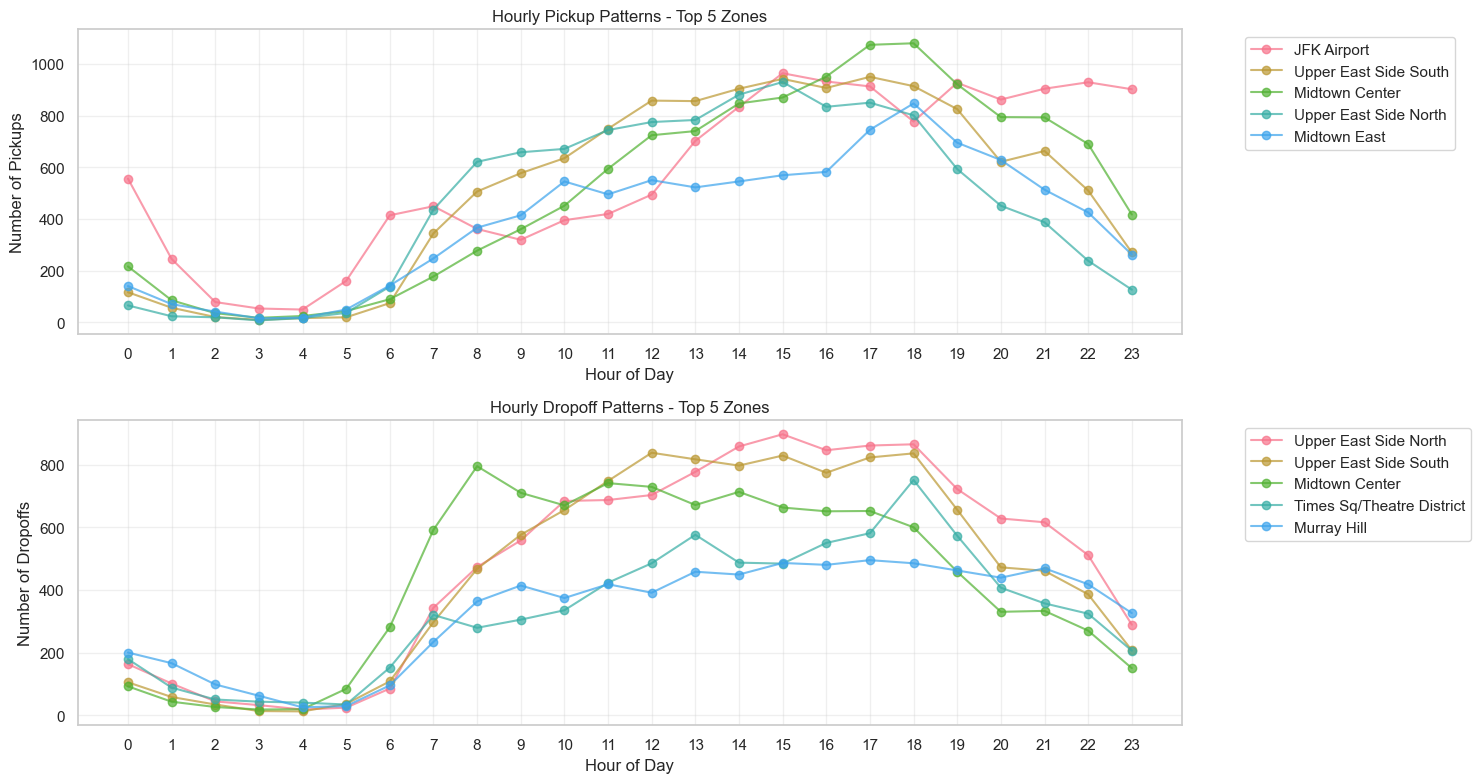


Top 10 Pickup Zones:
------------------------------------------------------------
JFK Airport                         13,638 pickups
Upper East Side South               12,341 pickups
Midtown Center                      12,269 pickups
Upper East Side North               11,083 pickups
Midtown East                        9,425 pickups
LaGuardia Airport                   9,018 pickups
Penn Station/Madison Sq West        8,871 pickups
Times Sq/Theatre District           8,741 pickups
Lincoln Square East                 8,628 pickups
Murray Hill                         7,790 pickups

Top 10 Dropoff Zones:
------------------------------------------------------------
Upper East Side North               11,785 dropoffs
Upper East Side South               11,005 dropoffs
Midtown Center                      10,291 dropoffs
Times Sq/Theatre District           8,029 dropoffs
Murray Hill                         7,836 dropoffs
Midtown East                        7,500 dropoffs
Lincoln Square East 

In [184]:
# Find top 10 pickup and dropoff zones
# Calculate hourly pickups and dropoffs for each zone
zone_hourly_pickups = df_with_zones.groupby(['pickup_zone', 'hour'])['PULocationID'].count().reset_index(name='pickups')
zone_hourly_dropoffs = df_with_zones.groupby(['dropoff_zone', 'hour'])['DOLocationID'].count().reset_index(name='dropoffs')

# Get top 10 zones by total pickups and dropoffs
top_pickup_zones = zone_hourly_pickups.groupby('pickup_zone')['pickups'].sum().nlargest(10)
top_dropoff_zones = zone_hourly_dropoffs.groupby('dropoff_zone')['dropoffs'].sum().nlargest(10)

# Create visualization
plt.figure(figsize=(15, 8))

# Create two subplots
plt.subplot(2, 1, 1)
for zone in top_pickup_zones.index[:5]:  # Show top 5 for clarity
    zone_data = zone_hourly_pickups[zone_hourly_pickups['pickup_zone'] == zone]
    plt.plot(zone_data['hour'], zone_data['pickups'], marker='o', label=zone, alpha=0.7)

plt.title('Hourly Pickup Patterns - Top 5 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))

plt.subplot(2, 1, 2)
for zone in top_dropoff_zones.index[:5]:  # Show top 5 for clarity
    zone_data = zone_hourly_dropoffs[zone_hourly_dropoffs['dropoff_zone'] == zone]
    plt.plot(zone_data['hour'], zone_data['dropoffs'], marker='o', label=zone, alpha=0.7)

plt.title('Hourly Dropoff Patterns - Top 5 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTop 10 Pickup Zones:")
print("-" * 60)
for zone, pickups in top_pickup_zones.items():
    print(f"{zone:<35} {pickups:,} pickups")

print("\nTop 10 Dropoff Zones:")
print("-" * 60)
for zone, dropoffs in top_dropoff_zones.items():
    print(f"{zone:<35} {dropoffs:,} dropoffs")

# Analyze peak hours for top zones
print("\nPeak Hours Analysis for Top Zones:")
print("-" * 60)
for zone in top_pickup_zones.index[:3]:
    peak_hour = zone_hourly_pickups[zone_hourly_pickups['pickup_zone'] == zone]\
        .sort_values('pickups', ascending=False).iloc[0]
    print(f"\n{zone}:")
    print(f"Peak hour: {int(peak_hour['hour']):02d}:00 with {peak_hour['pickups']} pickups")


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

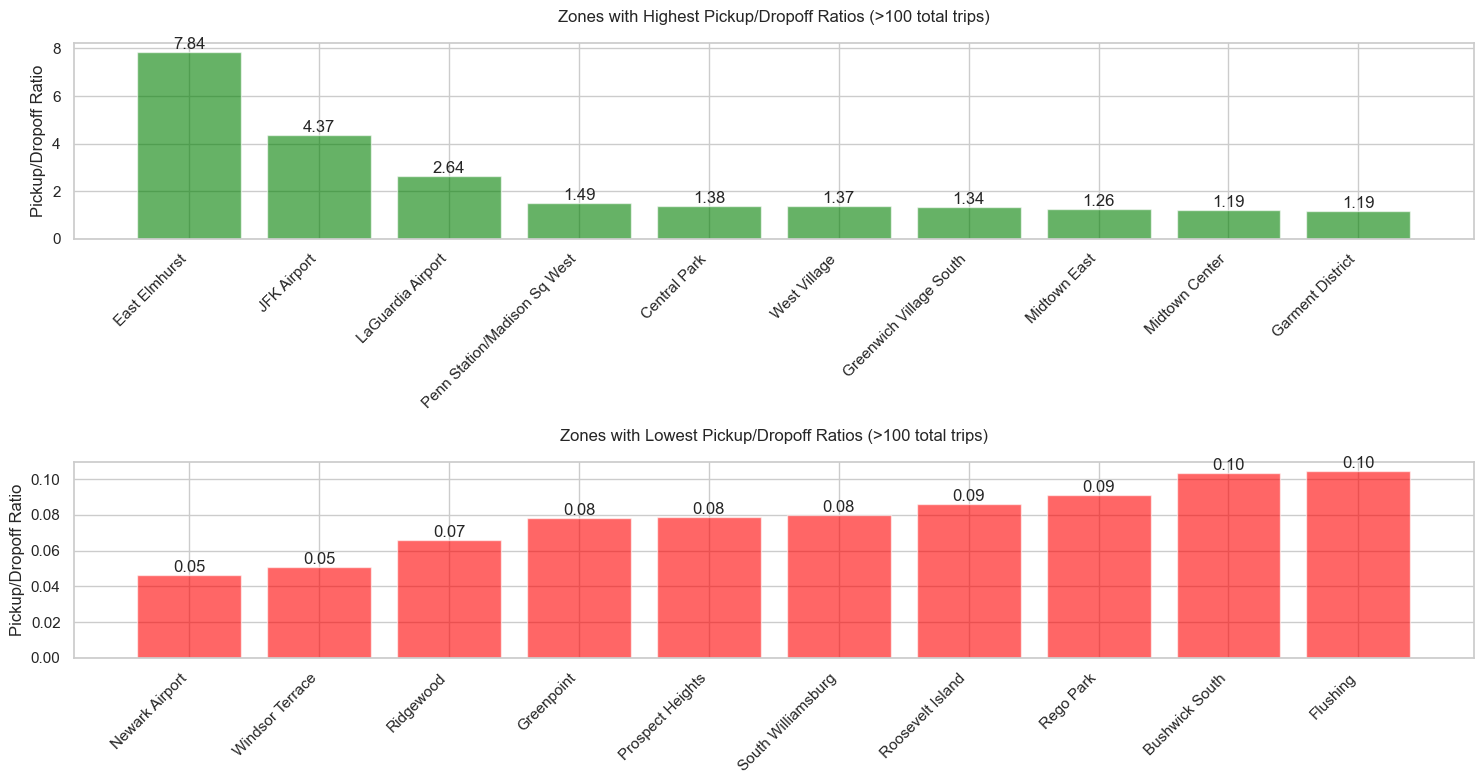


Zones with Highest Pickup/Dropoff Ratios:
--------------------------------------------------------------------------------
Zone                                  Ratio    Pickups    Dropoffs    Total Trips
--------------------------------------------------------------------------------
East Elmhurst                           7.84      1192        152         1344
JFK Airport                             4.37     13638       3123        16761
LaGuardia Airport                       2.64      9018       3411        12429
Penn Station/Madison Sq West            1.49      8871       5952        14823
Central Park                            1.38      4465       3236         7701
West Village                            1.37      5953       4334        10287
Greenwich Village South                 1.34      3475       2590         6065
Midtown East                            1.26      9425       7500        16925
Midtown Center                          1.19     12269      10291        22560
Ga

In [185]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate total pickups and dropoffs for each zone
zone_stats = pd.DataFrame({
    'pickups': df_with_zones.groupby('pickup_zone')['PULocationID'].count(),
    'dropoffs': df_with_zones.groupby('dropoff_zone')['DOLocationID'].count()
}).fillna(0)

# Calculate pickup/dropoff ratio
zone_stats['ratio'] = zone_stats['pickups'] / zone_stats['dropoffs']
zone_stats['total_trips'] = zone_stats['pickups'] + zone_stats['dropoffs']

# Filter zones with significant number of trips (e.g., > 100 total trips)
significant_zones = zone_stats[zone_stats['total_trips'] > 100].copy()

# Sort by ratio for highest and lowest
highest_ratios = significant_zones.nlargest(10, 'ratio')
lowest_ratios = significant_zones.nsmallest(10, 'ratio')

# Create visualization
plt.figure(figsize=(15, 8))

# Plot highest ratios
plt.subplot(2, 1, 1)
bars = plt.bar(range(len(highest_ratios)), highest_ratios['ratio'], color='green', alpha=0.6)
plt.title('Zones with Highest Pickup/Dropoff Ratios (>100 total trips)', pad=15)
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(range(len(highest_ratios)), highest_ratios.index, rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Plot lowest ratios
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(lowest_ratios)), lowest_ratios['ratio'], color='red', alpha=0.6)
plt.title('Zones with Lowest Pickup/Dropoff Ratios (>100 total trips)', pad=15)
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(range(len(lowest_ratios)), lowest_ratios.index, rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nZones with Highest Pickup/Dropoff Ratios:")
print("-" * 80)
print("Zone                                  Ratio    Pickups    Dropoffs    Total Trips")
print("-" * 80)
for zone in highest_ratios.index:
    print(f"{zone:<35} {highest_ratios.loc[zone, 'ratio']:8.2f} {highest_ratios.loc[zone, 'pickups']:9.0f} {highest_ratios.loc[zone, 'dropoffs']:10.0f} {highest_ratios.loc[zone, 'total_trips']:12.0f}")

print("\nZones with Lowest Pickup/Dropoff Ratios:")
print("-" * 80)
print("Zone                                  Ratio    Pickups    Dropoffs    Total Trips")
print("-" * 80)
for zone in lowest_ratios.index:
    print(f"{zone:<35} {lowest_ratios.loc[zone, 'ratio']:8.2f} {lowest_ratios.loc[zone, 'pickups']:9.0f} {lowest_ratios.loc[zone, 'dropoffs']:10.0f} {lowest_ratios.loc[zone, 'total_trips']:12.0f}")


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

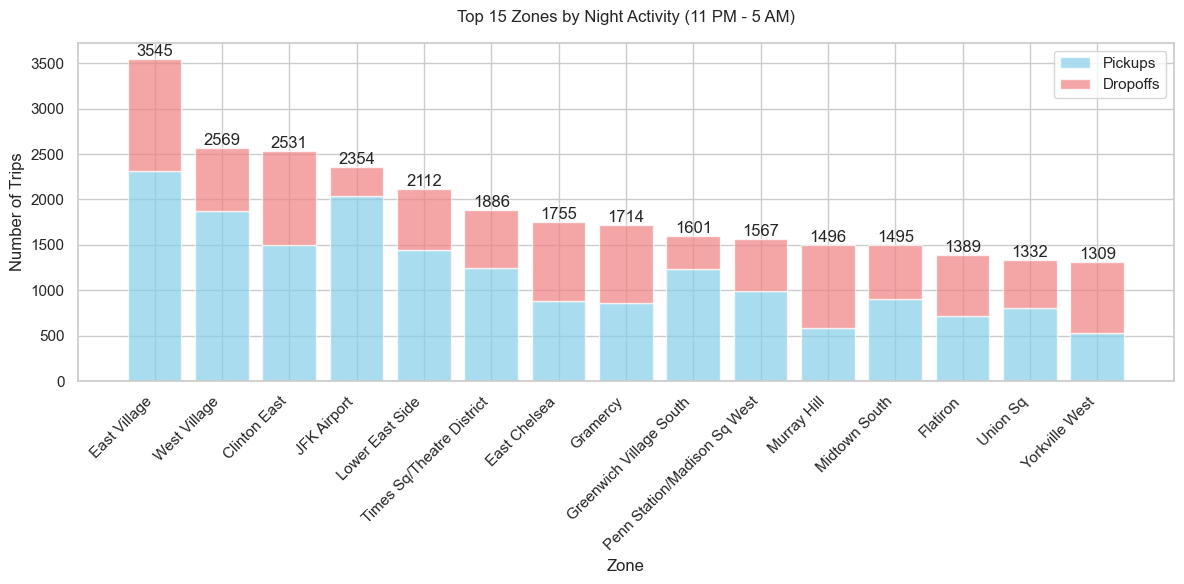


Top Night Activity Zones (11 PM - 5 AM):
--------------------------------------------------------------------------------
Zone                                  Pickups  Dropoffs  Total
--------------------------------------------------------------------------------
East Village                            2313      1232    3545
West Village                            1877       692    2569
Clinton East                            1495      1036    2531
JFK Airport                             2043       311    2354
Lower East Side                         1448       664    2112
Times Sq/Theatre District               1246       640    1886
East Chelsea                             880       875    1755
Gramercy                                 861       853    1714
Greenwich Village South                 1234       367    1601
Penn Station/Madison Sq West             997       570    1567
Murray Hill                              590       906    1496
Midtown South                           

In [187]:
# Define night hours
night_hours = list(range(23, 24)) + list(range(0, 6))  # 11 PM to 5 AM

# Filter for night hours
night_trips = df_with_zones[df_with_zones['hour'].isin(night_hours)]

# Calculate night activity for each zone
night_stats = pd.DataFrame({
    'night_pickups': night_trips.groupby('pickup_zone')['PULocationID'].count(),
    'night_dropoffs': night_trips.groupby('dropoff_zone')['DOLocationID'].count()
}).fillna(0)

# Calculate total night trips
night_stats['total_night_trips'] = night_stats['night_pickups'] + night_stats['night_dropoffs']

# Sort by total night trips
night_stats = night_stats.sort_values('total_night_trips', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))

# Get top 15 zones for visualization
top_15_zones = night_stats.head(15)

# Create stacked bar chart
plt.bar(range(len(top_15_zones)), top_15_zones['night_pickups'], 
        label='Pickups', color='skyblue', alpha=0.7)
plt.bar(range(len(top_15_zones)), top_15_zones['night_dropoffs'], 
        bottom=top_15_zones['night_pickups'], label='Dropoffs', 
        color='lightcoral', alpha=0.7)

# Customize plot
plt.title('Top 15 Zones by Night Activity (11 PM - 5 AM)', pad=15)
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.legend()

# Rotate x-axis labels
plt.xticks(range(len(top_15_zones)), top_15_zones.index, rotation=45, ha='right')

# Add total labels
for i in range(len(top_15_zones)):
    total = top_15_zones['total_night_trips'].iloc[i]
    plt.text(i, total, f'{int(total)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nTop Night Activity Zones (11 PM - 5 AM):")
print("-" * 80)
print("Zone                                  Pickups  Dropoffs  Total")
print("-" * 80)

for zone in top_15_zones.index:
    pickups = night_stats.loc[zone, 'night_pickups']
    dropoffs = night_stats.loc[zone, 'night_dropoffs']
    total = night_stats.loc[zone, 'total_night_trips']
    print(f"{zone:<35} {int(pickups):8d} {int(dropoffs):9d} {int(total):7d}")

# Additional insights
print("\nKey Insights:")
print("-" * 80)
print(f"Total night trips: {len(night_trips):,}")
print(f"Percentage of all trips that occur at night: {(len(night_trips)/len(df_with_zones)*100):.1f}%")

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

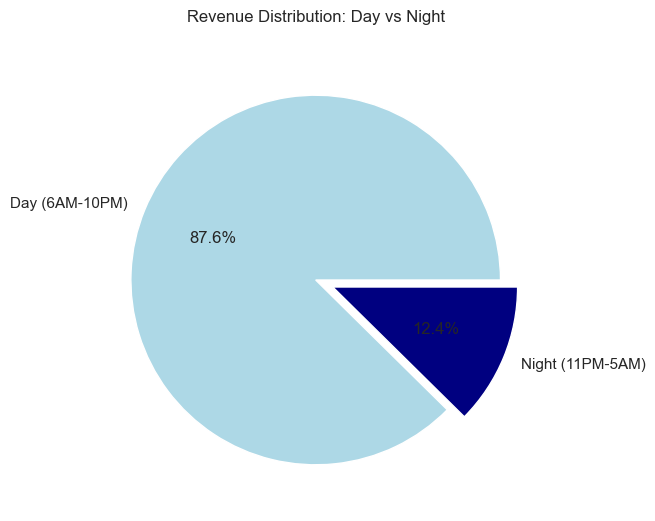


Revenue Analysis (Day vs Night):
------------------------------------------------------------
Day Revenue (6AM-10PM): $6,723,403.11
Night Revenue (11PM-5AM): $950,864.45
Total Revenue: $7,674,267.56

Average Revenue per Trip:
------------------------------------------------------------
Day: $28.80 per trip
Night: $29.65 per trip

Average Revenue per Hour:
------------------------------------------------------------
Day: $13183.14 per hour
Night: $4527.93 per hour


In [188]:
# Filter for night hours (11 PM to 5 AM)
# Define night and day hours
#night_hours = list(range(23, 24)) + list(range(0, 6))  # 11 PM to 5 AM
day_hours = list(range(6, 23))  # 6 AM to 10 PM

# Calculate revenue for night and day
night_revenue = df_with_zones[df_with_zones['hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df_with_zones[df_with_zones['hour'].isin(day_hours)]['total_amount'].sum()

total_revenue = night_revenue + day_revenue

# Create visualization
plt.figure(figsize=(10, 6))

# Create pie chart
plt.pie([day_revenue, night_revenue], 
        labels=['Day (6AM-10PM)', 'Night (11PM-5AM)'],
        autopct='%1.1f%%',
        colors=['lightblue', 'navy'],
        explode=(0, 0.1))

plt.title('Revenue Distribution: Day vs Night', pad=20)

plt.show()

# Print detailed analysis
print("\nRevenue Analysis (Day vs Night):")
print("-" * 60)
print(f"Day Revenue (6AM-10PM): ${day_revenue:,.2f}")
print(f"Night Revenue (11PM-5AM): ${night_revenue:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")

# Calculate average revenue per trip
night_trips = len(df_with_zones[df_with_zones['hour'].isin(night_hours)])
day_trips = len(df_with_zones[df_with_zones['hour'].isin(day_hours)])

print("\nAverage Revenue per Trip:")
print("-" * 60)
print(f"Day: ${day_revenue/day_trips:.2f} per trip")
print(f"Night: ${night_revenue/night_trips:.2f} per trip")

# Calculate revenue per hour
day_hours_count = len(day_hours)
night_hours_count = len(night_hours)

print("\nAverage Revenue per Hour:")
print("-" * 60)
print(f"Day: ${day_revenue/(day_hours_count*30):.2f} per hour")  # assuming 30 days
print(f"Night: ${night_revenue/(night_hours_count*30):.2f} per hour")  # assuming 30 days


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

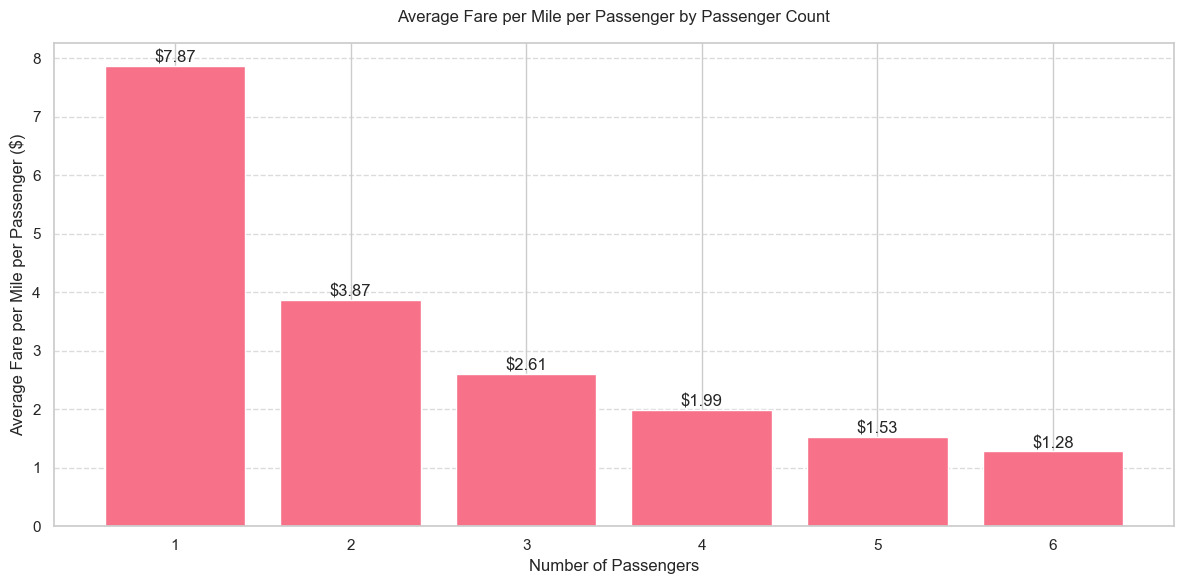


Detailed Fare Analysis by Passenger Count:
--------------------------------------------------------------------------------
Passengers  Avg Fare/Mile/Passenger    Avg Distance    Avg Fare    Number of Trips
--------------------------------------------------------------------------------
    1      $                7.87           3.39 $     19.13          206,305
    2      $                3.87           4.17 $     22.17           38,676
    3      $                2.61           3.98 $     21.91            9,642
    4      $                1.99           4.25 $     23.16            5,342
    5      $                1.53           3.36 $     18.94            3,302
    6      $                1.28           3.34 $     18.84            2,234

Trip Distribution by Passenger Count:
--------------------------------------------------
1 passenger(s): 77.7%
2 passenger(s): 14.57%
3 passenger(s): 3.63%
4 passenger(s): 2.01%
5 passenger(s): 1.24%
6 passenger(s): 0.84%


In [189]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df_with_zones['fare_per_mile_per_passenger'] = (
    df_with_zones['fare_amount'] / 
    df_with_zones['trip_distance'] / 
    df_with_zones['passenger_count']
)

# Group by passenger count and calculate average
passenger_fares = df_with_zones.groupby('passenger_count').agg({
    'fare_per_mile_per_passenger': 'mean',
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'PULocationID': 'count'  # number of trips
}).round(2)

# Rename columns for clarity
passenger_fares.columns = ['Avg Fare/Mile/Passenger', 'Avg Distance', 'Avg Fare', 'Number of Trips']

# Create visualization
plt.figure(figsize=(12, 6))

# Bar plot for fare per mile per passenger
bars = plt.bar(passenger_fares.index, passenger_fares['Avg Fare/Mile/Passenger'])

# Customize plot
plt.title('Average Fare per Mile per Passenger by Passenger Count', pad=15)
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Fare Analysis by Passenger Count:")
print("-" * 80)
print("Passengers  Avg Fare/Mile/Passenger    Avg Distance    Avg Fare    Number of Trips")
print("-" * 80)
for idx in passenger_fares.index:
    print(f"{idx:^10d} ${passenger_fares.loc[idx, 'Avg Fare/Mile/Passenger']:>20.2f} {passenger_fares.loc[idx, 'Avg Distance']:>14.2f} ${passenger_fares.loc[idx, 'Avg Fare']:>10.2f} {passenger_fares.loc[idx, 'Number of Trips']:>16,d}")

# Calculate percentage distribution of trips
trip_distribution = (passenger_fares['Number of Trips'] / 
                    passenger_fares['Number of Trips'].sum() * 100).round(2)

print("\nTrip Distribution by Passenger Count:")
print("-" * 50)
for idx in trip_distribution.index:
    print(f"{idx} passenger(s): {trip_distribution[idx]}%")



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week


Hourly Fare Analysis:
------------------------------------------------------------
Hour    Avg Fare/Mile    Peak Hours
------------------------------------------------------------
00:00   $    6.67        
01:00   $    6.67        
02:00   $    6.62        
03:00   $    6.46        
04:00   $    5.97        
05:00   $    5.98        
06:00   $    6.30        
07:00   $    7.06        Morning Peak
08:00   $    7.72        Morning Peak
09:00   $    7.98        Morning Peak
10:00   $    8.19        Morning Peak
11:00   $    8.52        
12:00   $    8.62        
13:00   $    8.50        
14:00   $    8.47        
15:00   $    8.46        
16:00   $    8.47        Evening Peak
17:00   $    8.42        Evening Peak
18:00   $    8.23        Evening Peak
19:00   $    7.92        Evening Peak
20:00   $    7.28        
21:00   $    7.10        
22:00   $    6.95        
23:00   $    6.68        

Daily Fare Analysis:
------------------------------------------------------------
Day         Avg 

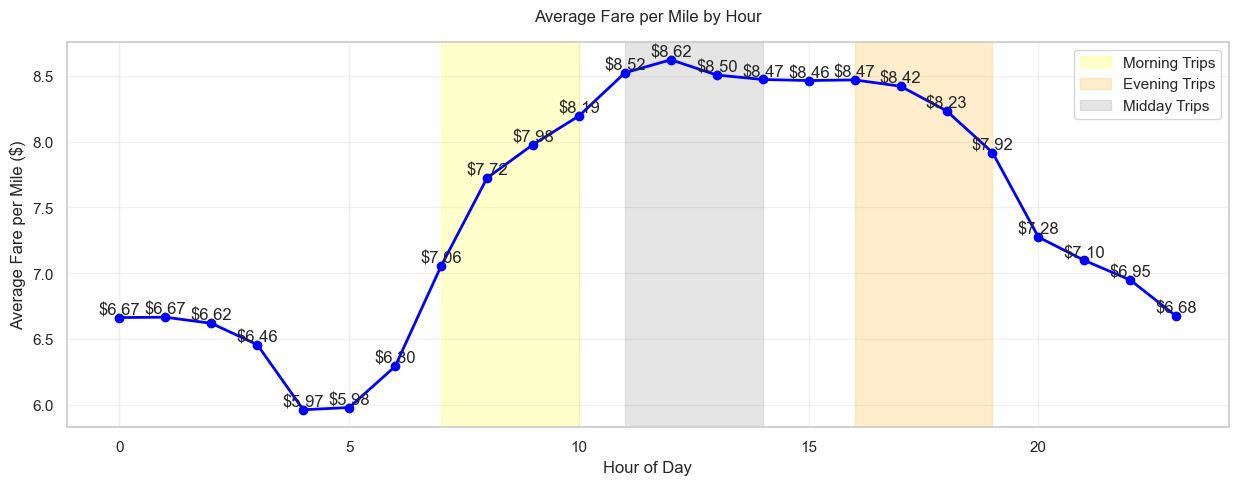

In [230]:
# Calculate fare per mile
df_with_zones['fare_per_mile'] = df_with_zones['fare_amount'] / df_with_zones['trip_distance']

# Calculate average fare per mile by hour and day
hourly_fares = df_with_zones.groupby('hour')['fare_per_mile'].mean()
daily_fares = df_with_zones.groupby('day_of_week')['fare_per_mile'].mean()

# Create figure with one subplots
fig, ax1 = plt.subplots(1, figsize=(15, 5))

# 1. Hourly fare pattern
ax1.plot(hourly_fares.index, hourly_fares.values, marker='o', color='blue', linewidth=2)
ax1.set_title('Average Fare per Mile by Hour', pad=15)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Fare per Mile ($)')
ax1.grid(True, alpha=0.3)

# Adding period highlights
ax1.axvspan(7, 10, alpha=0.2, color='yellow', label='Morning Trips')
ax1.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Trips')
ax1.axvspan(11, 14, alpha=0.2, color='grey', label = 'Midday Trips')
ax1.legend()

# Add value labels
for i, v in enumerate(hourly_fares):
    ax1.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# # 2. Daily fare pattern
# # Reorder days
# day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# daily_fares = daily_fares.reindex(day_order)

# bars = ax2.bar(daily_fares.index, daily_fares.values, color='skyblue')
# ax2.set_title('Average Fare per Mile by Day of Week', pad=15)
# ax2.set_xlabel('Day of Week')
# ax2.set_ylabel('Average Fare per Mile ($)')
# ax2.grid(True, alpha=0.3)

# # Add value labels on bars
# for bar in bars:
#     height = bar.get_height()
#     ax2.text(bar.get_x() + bar.get_width()/2., height,
#              f'${height:.2f}',
#              ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

# Print detailed analysis
print("\nHourly Fare Analysis:")
print("-" * 60)
print("Hour    Avg Fare/Mile    Peak Hours")
print("-" * 60)
for hour, fare in hourly_fares.items():
    peak_status = ""
    if 7 <= hour <= 10:
        peak_status = "Morning Peak"
    elif 16 <= hour <= 19:
        peak_status = "Evening Peak"
    print(f"{hour:02d}:00   ${fare:8.2f}        {peak_status}")

print("\nDaily Fare Analysis:")
print("-" * 60)
print("Day         Avg Fare/Mile    % Difference from Weekday Avg")
print("-" * 60)

# Calculate weekday average
weekday_avg = daily_fares[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()

for day, fare in daily_fares.items():
    diff_pct = ((fare - weekday_avg) / weekday_avg * 100)
    print(f"{day:<10} ${fare:8.2f}        {diff_pct:+.1f}%")

Work Week Average - Week Average ------> 0.14947186227420506


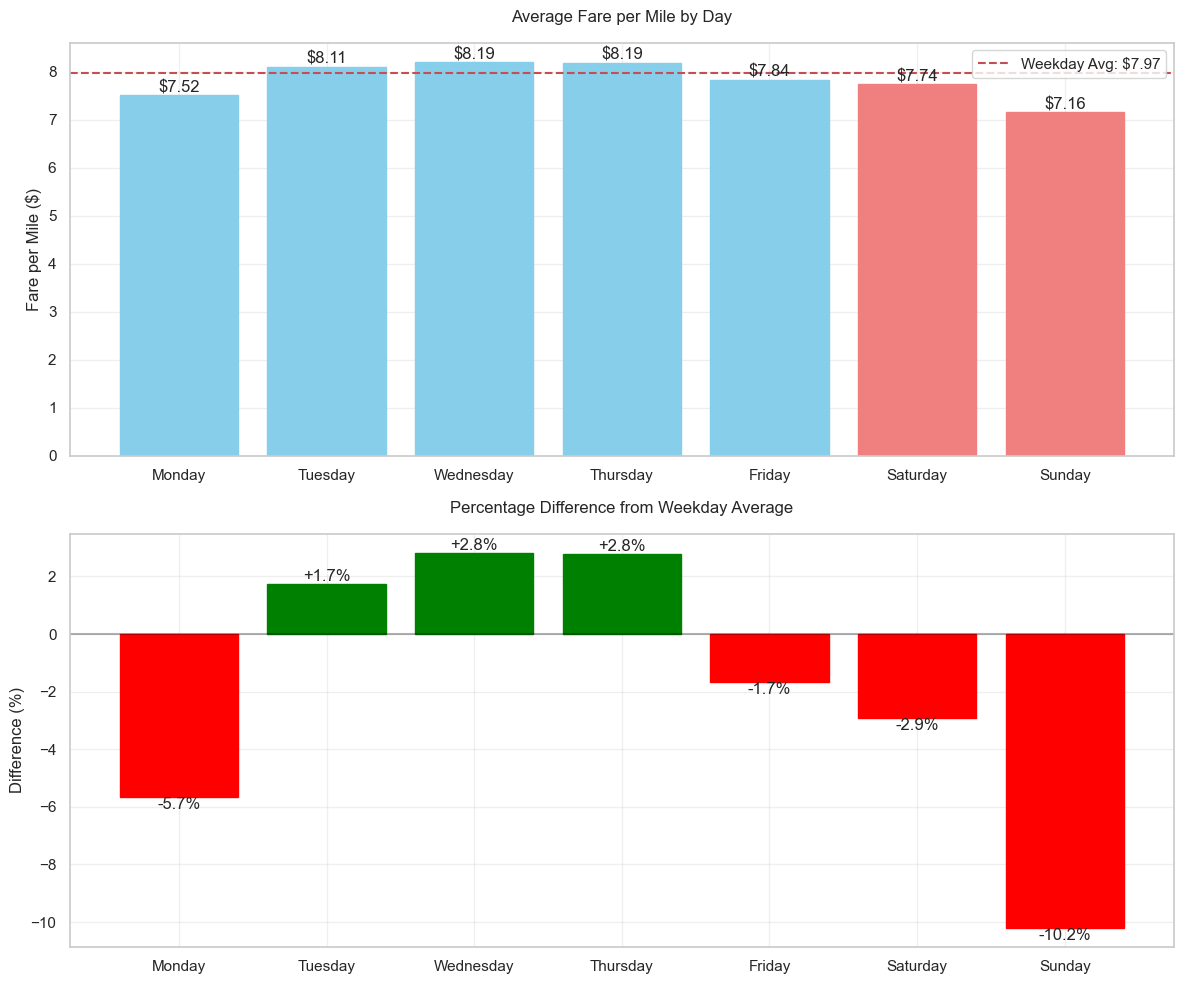

In [235]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Daily fare pattern with weekday average highlighted
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fares = [daily_fares[day] for day in days]

# Create bar plot
bars = ax1.bar(days, fares)

# Add weekday average line
weekday_indices = [0, 1, 2, 3, 4]  # Monday to Friday
weekday_avg = daily_fares[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()
weekday_avg_all = daily_fares[days].mean()
print("Work Week Average - Week Average ------>",weekday_avg-weekday_avg_all)
ax1.axhline(y=weekday_avg, color='r', linestyle='--', label=f'Weekday Avg: ${weekday_avg:.2f}')

# Color weekend bars differently
for i, bar in enumerate(bars):
    if i >= 5:  # Saturday and Sunday
        bar.set_color('lightcoral')
    else:
        bar.set_color('skyblue')

# Customize first plot
ax1.set_title('Average Fare per Mile by Day', pad=15)
ax1.set_ylabel('Fare per Mile ($)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

# 2. Percentage difference from weekday average
diff_pct = [(fare - weekday_avg) / weekday_avg * 100 for fare in fares]

# Create bars for percentage difference
bars2 = ax2.bar(days, diff_pct)

# Color bars based on positive/negative difference
for bar, pct in zip(bars2, diff_pct):
    if pct >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

# Customize second plot
ax2.set_title('Percentage Difference from Weekday Average', pad=15)
ax2.set_ylabel('Difference (%)')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add percentage labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:+.1f}%',
             ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [222]:
# Filter for only valid vendors (1 and 2)
df_valid_vendors = df_with_zones[df_with_zones['VendorID'].isin([1, 2])]

# Calculate average fare per mile by hour and vendor
vendor_hourly_fares = df_valid_vendors.groupby(['hour', 'VendorID'])['fare_per_mile'].mean()

# Create visualization
plt.figure(figsize=(14, 7))

# Plot lines for each vendor
for vendor in [1, 2]:  # Only plot for vendors 1 and 2
    vendor_data = df_valid_vendors[df_valid_vendors['VendorID'] == vendor]
    hourly_avg = vendor_data.groupby('hour')['fare_per_mile'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, 
             marker='o', 
             label=f'Vendor {vendor}', 
             linewidth=2, 
             alpha=0.7)

# Customize plot
plt.title('Average Fare per Mile by Vendor and Hour', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Add peak period highlights
plt.axvspan(7, 10, alpha=0.2, color='yellow', label='Morning Hours')
plt.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Hours')
plt.axvspan(11, 14, alpha=0.2, color='grey', label = 'Mystery Hours')
plt.legend()
plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nVendor Comparison by Hour:")
print("-" * 80)
print("Hour    Vendor 1    Vendor 2    Difference    Trip Count (V1/V2)")
print("-" * 80)

for hour in range(24):
    v1_data = df_valid_vendors[(df_valid_vendors['hour'] == hour) & 
                              (df_valid_vendors['VendorID'] == 1)]['fare_per_mile'].mean()
    v2_data = df_valid_vendors[(df_valid_vendors['hour'] == hour) & 
                              (df_valid_vendors['VendorID'] == 2)]['fare_per_mile'].mean()
    v1_count = df_valid_vendors[(df_valid_vendors['hour'] == hour) & 
                               (df_valid_vendors['VendorID'] == 1)].shape[0]
    v2_count = df_valid_vendors[(df_valid_vendors['hour'] == hour) & 
                               (df_valid_vendors['VendorID'] == 2)].shape[0]
    
    diff = v1_data - v2_data
    print(f"{hour:02d}:00   ${v1_data:8.2f}   ${v2_data:8.2f}   ${diff:8.2f}    {v1_count:d}/{v2_count:d}")

# Calculate overall statistics
print("\nOverall Vendor Statistics:")
print("-" * 80)
for vendor in [1, 2]:  # Only analyze vendors 1 and 2
    vendor_data = df_valid_vendors[df_valid_vendors['VendorID'] == vendor]
    print(f"\nVendor {vendor}:")
    print(f"Average fare per mile: ${vendor_data['fare_per_mile'].mean():.2f}")
    print(f"Total trips: {len(vendor_data):,}")
    print(f"Peak hour average: ${vendor_data[vendor_data['hour'].isin(range(7,11))]['fare_per_mile'].mean():.2f}")
    print(f"Off-peak average: ${vendor_data[~vendor_data['hour'].isin(range(7,11))]['fare_per_mile'].mean():.2f}")


Vendor Comparison by Hour:
--------------------------------------------------------------------------------
Hour    Vendor 1    Vendor 2    Difference    Trip Count (V1/V2)
--------------------------------------------------------------------------------
00:00   $    6.48   $    6.72   $   -0.25    1774/5733
01:00   $    6.44   $    6.73   $   -0.29    1133/3914
02:00   $    6.58   $    6.64   $   -0.06    799/2521
03:00   $    6.26   $    6.52   $   -0.27    529/1667
04:00   $    5.89   $    5.99   $   -0.10    386/1118
05:00   $    6.06   $    5.96   $    0.10    468/1081
06:00   $    6.31   $    6.30   $    0.01    1091/2574
07:00   $    7.03   $    7.07   $   -0.03    2219/5032
08:00   $    7.61   $    7.77   $   -0.17    2924/7131
09:00   $    8.00   $    7.97   $    0.03    3204/8135
10:00   $    8.04   $    8.26   $   -0.22    3572/8731
11:00   $    8.36   $    8.59   $   -0.23    3815/9540
12:00   $    8.60   $    8.63   $   -0.03    4009/10492
13:00   $    8.29   $    8.59   $

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


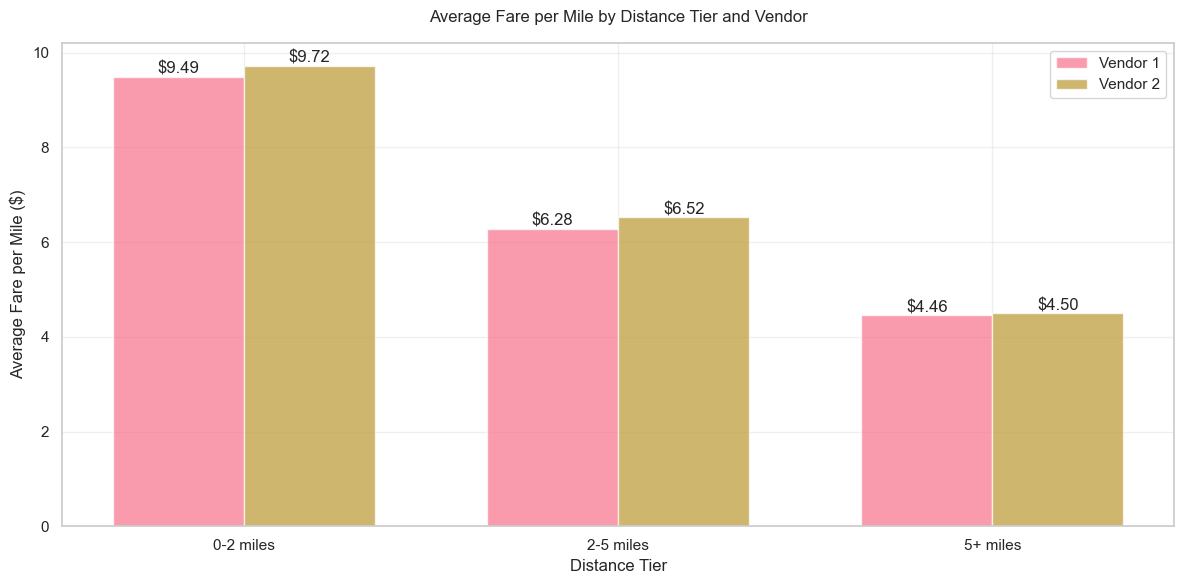


Detailed Analysis by Distance Tier:
--------------------------------------------------------------------------------

0-2 miles Analysis:
----------------------------------------

Vendor 1:
Average fare per mile: $9.49
Number of trips: 40,081.0
Average distance: 1.16 miles
Average fare: $9.96

Vendor 2:
Average fare per mile: $9.72
Number of trips: 104,307.0
Average distance: 1.16 miles
Average fare: $10.16

2-5 miles Analysis:
----------------------------------------

Vendor 1:
Average fare per mile: $6.28
Number of trips: 19,446.0
Average distance: 3.07 miles
Average fare: $18.89

Vendor 2:
Average fare per mile: $6.52
Number of trips: 54,393.0
Average distance: 3.02 miles
Average fare: $19.25

5+ miles Analysis:
----------------------------------------

Vendor 1:
Average fare per mile: $4.46
Number of trips: 11,482.0
Average distance: 11.17 miles
Average fare: $47.76

Vendor 2:
Average fare per mile: $4.50
Number of trips: 35,728.0
Average distance: 11.80 miles
Average fare: $50.89

In [194]:
# Defining distance tiers
# Define distance tiers
df_valid_vendors['distance_tier'] = pd.cut(df_valid_vendors['trip_distance'],
                                         bins=[0, 2, 5, float('inf')],
                                         labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Calculate statistics for each tier and vendor
tier_analysis = df_valid_vendors.groupby(['distance_tier', 'VendorID']).agg({
    'fare_per_mile': ['mean', 'std', 'count'],
    'trip_distance': 'mean',
    'fare_amount': 'mean'
}).round(2)

# Create visualization
plt.figure(figsize=(12, 6))

# Prepare data for plotting
tiers = ['0-2 miles', '2-5 miles', '5+ miles']
vendors = [1, 2]
x = np.arange(len(tiers))
width = 0.35

# Create grouped bar plot
for i, vendor in enumerate(vendors):
    vendor_data = [tier_analysis.loc[(tier, vendor), ('fare_per_mile', 'mean')] 
                  for tier in tiers]
    plt.bar(x + i*width, vendor_data, width, 
            label=f'Vendor {vendor}', alpha=0.7)

plt.title('Average Fare per Mile by Distance Tier and Vendor', pad=15)
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(x + width/2, tiers)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for i, vendor in enumerate(vendors):
    vendor_data = [tier_analysis.loc[(tier, vendor), ('fare_per_mile', 'mean')] 
                  for tier in tiers]
    for j, v in enumerate(vendor_data):
        plt.text(j + i*width, v, f'${v:.2f}', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Analysis by Distance Tier:")
print("-" * 80)
for tier in tiers:
    print(f"\n{tier} Analysis:")
    print("-" * 40)
    for vendor in vendors:
        stats = tier_analysis.loc[(tier, vendor)]
        print(f"\nVendor {vendor}:")
        print(f"Average fare per mile: ${stats[('fare_per_mile', 'mean')]:.2f}")
        print(f"Number of trips: {stats[('fare_per_mile', 'count')]:,}")
        print(f"Average distance: {stats[('trip_distance', 'mean')]:.2f} miles")
        print(f"Average fare: ${stats[('fare_amount', 'mean')]:.2f}")

# Calculate percentage differences
print("\nVendor Price Comparison by Tier:")
print("-" * 80)
for tier in tiers:
    v1_rate = tier_analysis.loc[(tier, 1), ('fare_per_mile', 'mean')]
    v2_rate = tier_analysis.loc[(tier, 2), ('fare_per_mile', 'mean')]
    diff_pct = ((v2_rate - v1_rate) / v1_rate * 100)
    print(f"\n{tier}:")
    print(f"Vendor 1: ${v1_rate:.2f}/mile")
    print(f"Vendor 2: ${v2_rate:.2f}/mile")
    print(f"Difference: {diff_pct:+.1f}%")


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [195]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df_valid_vendors['tip_percentage'] = (df_valid_vendors['tip_amount'] / df_valid_vendors['fare_amount'] * 100)

# 1. Tips by Distance Tier
plt.figure(figsize=(15, 5))

# First subplot - Distance Tiers
plt.subplot(1, 3, 1)
tips_by_distance = df_valid_vendors.groupby('distance_tier')['tip_percentage'].mean()
bars = plt.bar(tips_by_distance.index, tips_by_distance.values)
plt.title('Average Tip % by Distance')
plt.ylabel('Tip Percentage')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}%',
             ha='center', va='bottom')

# Second subplot - Passenger Count
plt.subplot(1, 3, 2)
tips_by_passengers = df_valid_vendors.groupby('passenger_count')['tip_percentage'].mean()
bars = plt.bar(tips_by_passengers.index, tips_by_passengers.values)
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip Percentage')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}%',
             ha='center', va='bottom')

# Third subplot - Time of Day
plt.subplot(1, 3, 3)
tips_by_hour = df_valid_vendors.groupby('hour')['tip_percentage'].mean()
plt.plot(tips_by_hour.index, tips_by_hour.values, marker='o')
plt.title('Average Tip % by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Percentage')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nTip Analysis by Distance Tier:")
print("-" * 60)
distance_analysis = df_valid_vendors.groupby('distance_tier').agg({
    'tip_percentage': ['mean', 'count'],
    'payment_type': lambda x: (x == 1).mean() * 100  # Percentage of credit card payments
}).round(2)
print(distance_analysis)

print("\nTip Analysis by Passenger Count:")
print("-" * 60)
passenger_analysis = df_valid_vendors.groupby('passenger_count').agg({
    'tip_percentage': ['mean', 'count'],
    'payment_type': lambda x: (x == 1).mean() * 100
}).round(2)
print(passenger_analysis)

print("\nTip Analysis by Time Period:")
print("-" * 60)
df_valid_vendors['time_period'] = pd.cut(df_valid_vendors['hour'],
                                        bins=[-1, 6, 10, 15, 19, 23],
                                        labels=['Night (0-6)', 'Morning Peak (7-10)',
                                               'Midday (11-15)', 'Evening Peak (16-19)',
                                               'Evening (20-23)'])
time_analysis = df_valid_vendors.groupby('time_period').agg({
    'tip_percentage': ['mean', 'count'],
    'payment_type': lambda x: (x == 1).mean() * 100
}).round(2)
print(time_analysis)

# Analyze low tip cases
low_tip_threshold = 10  # Define low tip as less than 10%
low_tip_trips = df_valid_vendors[df_valid_vendors['tip_percentage'] < low_tip_threshold]

print("\nLow Tip Analysis (Tips < 10%):")
print("-" * 60)
print(f"Number of low tip trips: {len(low_tip_trips):,}")
print(f"Percentage of all trips: {(len(low_tip_trips)/len(df_valid_vendors)*100):.1f}%")
print("\nCharacteristics of Low Tip Trips:")
print(f"Average distance: {low_tip_trips['trip_distance'].mean():.2f} miles")
print(f"Average fare: ${low_tip_trips['fare_amount'].mean():.2f}")
print(f"Cash payment percentage: {(low_tip_trips['payment_type'] == 2).mean()*100:.1f}%")



Tip Analysis by Distance Tier:
------------------------------------------------------------
              tip_percentage         payment_type
                        mean   count     <lambda>
distance_tier                                    
0-2 miles              21.31  144388        80.53
2-5 miles              18.06   73839        85.15
5+ miles               15.98   47210        82.02

Tip Analysis by Passenger Count:
------------------------------------------------------------
                tip_percentage         payment_type
                          mean   count     <lambda>
passenger_count                                    
1                        19.61  206241        83.01
2                        19.13   38676        79.64
3                        18.47    9642        77.61
4                        16.75    5342        71.53
5                        20.36    3302        82.16
6                        20.19    2234        82.77

Tip Analysis by Time Period:
--------------

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

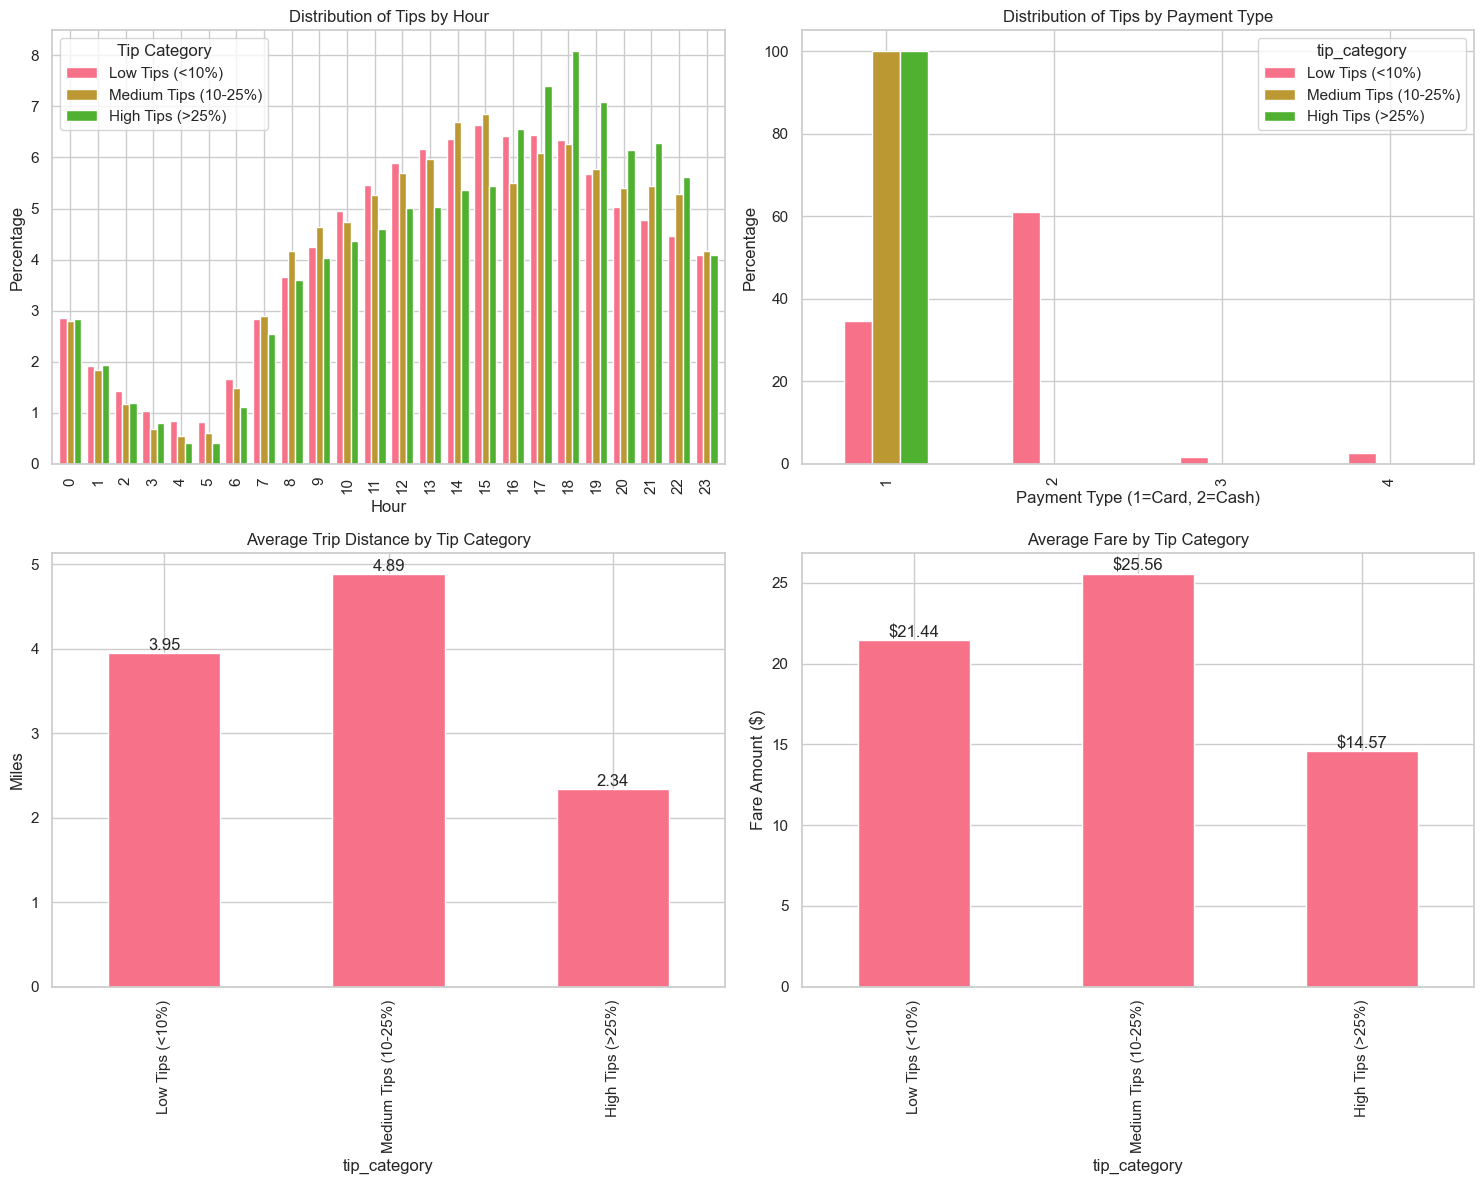


Detailed Comparison of Tip Categories:
--------------------------------------------------------------------------------
                      Avg Distance  Avg Fare  Avg Passengers  % Card Payments  \
tip_category                                                                    
Low Tips (<10%)               3.95     21.44            1.40            34.69   
Medium Tips (10-25%)          4.89     25.56            1.36           100.00   
High Tips (>25%)              2.34     14.57            1.36            99.99   

                      Number of Trips  
tip_category                           
Low Tips (<10%)                 72824  
Medium Tips (10-25%)            79347  
High Tips (>25%)               113266  

Distribution of Tip Categories:
--------------------------------------------------------------------------------
Low Tips (<10%): 72,824 trips (27.4%)
High Tips (>25%): 113,266 trips (42.7%)
Medium Tips (10-25%): 79,347 trips (29.9%)


In [197]:
# Define low and high tip thresholds
low_tip_threshold = 10
high_tip_threshold = 25  # Tips above 25%

# Create categories
df_valid_vendors['tip_category'] = pd.cut(df_valid_vendors['tip_percentage'],
                                        bins=[-float('inf'), low_tip_threshold, 
                                             high_tip_threshold, float('inf')],
                                        labels=['Low Tips (<10%)', 
                                               'Medium Tips (10-25%)',
                                               'High Tips (>25%)'])

# Create comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Time of Day Distribution
tips_by_hour = pd.crosstab(df_valid_vendors['hour'], 
                          df_valid_vendors['tip_category'], 
                          normalize='columns') * 100
tips_by_hour.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Distribution of Tips by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Percentage')
ax1.legend(title='Tip Category')

# 2. Payment Type Distribution
payment_dist = pd.crosstab(df_valid_vendors['payment_type'], 
                          df_valid_vendors['tip_category'], 
                          normalize='columns') * 100
payment_dist.plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Tips by Payment Type')
ax2.set_xlabel('Payment Type (1=Card, 2=Cash)')
ax2.set_ylabel('Percentage')

# 3. Distance Distribution
distance_stats = df_valid_vendors.groupby('tip_category')['trip_distance'].mean()
distance_stats.plot(kind='bar', ax=ax3)
ax3.set_title('Average Trip Distance by Tip Category')
ax3.set_ylabel('Miles')
for i, v in enumerate(distance_stats):
    ax3.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# 4. Fare Distribution
fare_stats = df_valid_vendors.groupby('tip_category')['fare_amount'].mean()
fare_stats.plot(kind='bar', ax=ax4)
ax4.set_title('Average Fare by Tip Category')
ax4.set_ylabel('Fare Amount ($)')
for i, v in enumerate(fare_stats):
    ax4.text(i, v, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Comparison of Tip Categories:")
print("-" * 80)
comparison = df_valid_vendors.groupby('tip_category').agg({
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'passenger_count': 'mean',
    'payment_type': lambda x: (x == 1).mean() * 100,  # % of card payments
    'PULocationID': 'count'  # number of trips
}).round(2)

comparison.columns = ['Avg Distance', 'Avg Fare', 'Avg Passengers', 
                     '% Card Payments', 'Number of Trips']
print(comparison)

# Calculate percentages of each category
total_trips = len(df_valid_vendors)
print("\nDistribution of Tip Categories:")
print("-" * 80)
for category in df_valid_vendors['tip_category'].unique():
    count = len(df_valid_vendors[df_valid_vendors['tip_category'] == category])
    percentage = (count/total_trips) * 100
    print(f"{category}: {count:,} trips ({percentage:.1f}%)")

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [200]:
# See how passenger count varies across hours and days
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Average passengers by hour
hourly_passengers = df_valid_vendors.groupby('hour')['passenger_count'].agg(['mean', 'count'])
ax1.plot(hourly_passengers.index, hourly_passengers['mean'], marker='o', linewidth=2)
ax1.set_title('Average Number of Passengers by Hour', pad=15)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Passengers')
ax1.grid(True, alpha=0.3)

# Add peak period highlights
ax1.axvspan(7, 10, alpha=0.2, color='yellow', label='Morning Peak')
ax1.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Peak')
ax1.legend()

# Add value labels
for i, row in hourly_passengers.iterrows():
    ax1.text(i, row['mean'], f'{row["mean"]:.2f}', ha='center', va='bottom')

# 2. Average passengers by day of week
daily_passengers = df_valid_vendors.groupby('day_of_week')['passenger_count'].agg(['mean', 'count'])
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passengers = daily_passengers.reindex(day_order)

bars = ax2.bar(daily_passengers.index, daily_passengers['mean'])
ax2.set_title('Average Number of Passengers by Day of Week', pad=15)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Passengers')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Create figure with two subplots (keep the visualization part same as before)

# Print detailed analysis with corrected format
print("\nHourly Passenger Analysis:")
print("-" * 60)
print("Hour    Avg Passengers    Trip Count    Peak Hours")
print("-" * 60)
for hour, row in hourly_passengers.iterrows():
    peak_status = ""
    if 7 <= hour <= 10:
        peak_status = "Morning Peak"
    elif 16 <= hour <= 19:
        peak_status = "Evening Peak"
    print(f"{hour:02d}:00   {row['mean']:8.2f}        {int(row['count']):6d}    {peak_status}")

print("\nDaily Passenger Analysis:")
print("-" * 60)
print("Day         Avg Passengers    Trip Count")
print("-" * 60)
for day, row in daily_passengers.iterrows():
    print(f"{day:<10} {row['mean']:8.2f}        {int(row['count']):6d}")

# Calculate additional statistics
print("\nAdditional Insights:")
print("-" * 60)
print("Weekday vs Weekend Comparison:")
df_valid_vendors['is_weekend'] = df_valid_vendors['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_comparison = df_valid_vendors.groupby('is_weekend').agg({
    'passenger_count': ['mean', 'count']
}).round(2)

print("Weekdays:")
print(f"Average passengers: {weekend_comparison.loc[False, ('passenger_count', 'mean')]:.2f}")
print(f"Number of trips: {int(weekend_comparison.loc[False, ('passenger_count', 'count')]):,}")
print("\nWeekends:")
print(f"Average passengers: {weekend_comparison.loc[True, ('passenger_count', 'mean')]:.2f}")
print(f"Number of trips: {int(weekend_comparison.loc[True, ('passenger_count', 'count')]):,}")

# Calculate peak vs off-peak
peak_hours = list(range(7,11)) + list(range(16,20))
peak_comparison = df_valid_vendors.groupby(
    df_valid_vendors['hour'].isin(peak_hours)
).agg({
    'passenger_count': ['mean', 'count']
}).round(2)

print("\nPeak vs Off-peak Comparison:")
print("\nPeak Hours (7-10 AM, 4-7 PM):")
print(f"Average passengers: {peak_comparison.loc[True, ('passenger_count', 'mean')]:.2f}")
print(f"Number of trips: {int(peak_comparison.loc[True, ('passenger_count', 'count')]):,}")
print("\nOff-peak Hours:")
print(f"Average passengers: {peak_comparison.loc[False, ('passenger_count', 'mean')]:.2f}")
print(f"Number of trips: {int(peak_comparison.loc[False, ('passenger_count', 'count')]):,}")



Hourly Passenger Analysis:
------------------------------------------------------------
Hour    Avg Passengers    Trip Count    Peak Hours
------------------------------------------------------------
00:00       1.39          7507    
01:00       1.43          5047    
02:00       1.41          3320    
03:00       1.40          2196    
04:00       1.31          1504    
05:00       1.27          1549    
06:00       1.22          3665    
07:00       1.26          7251    Morning Peak
08:00       1.29         10055    Morning Peak
09:00       1.31         11339    Morning Peak
10:00       1.35         12303    Morning Peak
11:00       1.35         13355    
12:00       1.36         14501    
13:00       1.36         14944    
14:00       1.39         16011    
15:00       1.40         16431    
16:00       1.39         16454    Evening Peak
17:00       1.37         17906    Evening Peak
18:00       1.36         18747    Evening Peak
19:00       1.38         16742    Evening Peak
20:

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [201]:
# How does passenger count vary across zones
# Calculate zone-wise passenger statistics
zone_passengers = df_valid_vendors.groupby('pickup_zone').agg({
    'passenger_count': ['mean', 'std', 'count'],
    'trip_distance': 'mean'
}).round(2)

zone_passengers.columns = ['Avg Passengers', 'Std Dev', 'Trip Count', 'Avg Distance']

# Sort by number of trips to get most active zones
top_zones = zone_passengers.sort_values('Trip Count', ascending=False).head(15)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. Top 15 zones by average passengers
bars1 = ax1.bar(range(len(top_zones)), top_zones['Avg Passengers'])
ax1.set_title('Average Passengers in Top 15 Busiest Zones', pad=15)
ax1.set_ylabel('Average Number of Passengers')
ax1.set_xticks(range(len(top_zones)))
ax1.set_xticklabels(top_zones.index, rotation=45, ha='right')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

# 2. Trip count and average distance
ax2.bar(range(len(top_zones)), top_zones['Trip Count'], alpha=0.6, label='Trip Count')
ax2.set_ylabel('Number of Trips')
ax2.set_xticks(range(len(top_zones)))
ax2.set_xticklabels(top_zones.index, rotation=45, ha='right')

# Add second y-axis for average distance
ax2_twin = ax2.twinx()
ax2_twin.plot(range(len(top_zones)), top_zones['Avg Distance'], 
              color='red', marker='o', linewidth=2, label='Avg Distance')
ax2_twin.set_ylabel('Average Trip Distance (miles)', color='red')

# Combine legends
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nZone Analysis (Top 15 by Trip Volume):")
print("-" * 80)
print(top_zones)

# Calculate statistics for different zone types
print("\nZone Type Analysis:")
print("-" * 80)

# Airport zones
airport_zones = ['JFK Airport', 'LaGuardia Airport']
airport_stats = df_valid_vendors[df_valid_vendors['pickup_zone'].isin(airport_zones)]\
    .groupby('pickup_zone')['passenger_count'].agg(['mean', 'count']).round(2)
print("\nAirport Zones:")
print(airport_stats)

# Manhattan zones (sample of busy areas)
manhattan_zones = ['Times Sq/Theatre District', 'Upper East Side South', 'Midtown Center']
manhattan_stats = df_valid_vendors[df_valid_vendors['pickup_zone'].isin(manhattan_zones)]\
    .groupby('pickup_zone')['passenger_count'].agg(['mean', 'count']).round(2)
print("\nManhattan Business Districts:")
print(manhattan_stats)

# Calculate correlation between trip distance and passenger count
correlation = df_valid_vendors[['trip_distance', 'passenger_count']].corr().iloc[0,1]
print(f"\nCorrelation between trip distance and passenger count: {correlation:.3f}")



Zone Analysis (Top 15 by Trip Volume):
--------------------------------------------------------------------------------
                              Avg Passengers  Std Dev  Trip Count  \
pickup_zone                                                         
JFK Airport                             1.50     0.90       13638   
Upper East Side South                   1.32     0.82       12341   
Midtown Center                          1.38     0.88       12269   
Upper East Side North                   1.35     0.88       11083   
Midtown East                            1.34     0.85        9425   
LaGuardia Airport                       1.37     0.84        9018   
Penn Station/Madison Sq West            1.35     0.84        8871   
Times Sq/Theatre District               1.48     0.92        8741   
Lincoln Square East                     1.36     0.81        8628   
Murray Hill                             1.34     0.86        7790   
Midtown North                           1.40     0.

Is this correlation OK? Yes, because:
It makes logical sense that trip distance and passenger count would be largely independent  
People don't necessarily travel in larger groups for longer distances  
Short trips can have many passengers (e.g., group dinner)  
Long trips can have single passengers (e.g., airport runs)  

In [202]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Create scatter plot with density indication
plt.figure(figsize=(10, 6))

# Use alpha to show density of points
plt.scatter(df_valid_vendors['trip_distance'], 
           df_valid_vendors['passenger_count'],
           alpha=0.1, s=1)

plt.title('Trip Distance vs Passenger Count')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Passengers')

# Add correlation line
z = np.polyfit(df_valid_vendors['trip_distance'], 
               df_valid_vendors['passenger_count'], 1)
p = np.poly1d(z)
plt.plot(df_valid_vendors['trip_distance'].sort_values(), 
         p(df_valid_vendors['trip_distance'].sort_values()), 
         "r--", alpha=0.8,
         label=f'Correlation: {0.038:.3f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print distribution statistics
print("\nPassenger Count Distribution by Distance Tier:")
print("-" * 60)
df_valid_vendors['distance_tier'] = pd.cut(df_valid_vendors['trip_distance'],
                                         bins=[0, 2, 5, 10, float('inf')],
                                         labels=['0-2 miles', '2-5 miles', 
                                                '5-10 miles', '10+ miles'])

dist_stats = df_valid_vendors.groupby('distance_tier')['passenger_count'].agg(['mean', 'std', 'count'])
print(dist_stats)



Passenger Count Distribution by Distance Tier:
------------------------------------------------------------
                   mean       std   count
distance_tier                            
0-2 miles      1.360397  0.861193  144388
2-5 miles      1.362992  0.857786   73839
5-10 miles     1.350116  0.840418   23775
10+ miles      1.477918  0.901558   23435


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

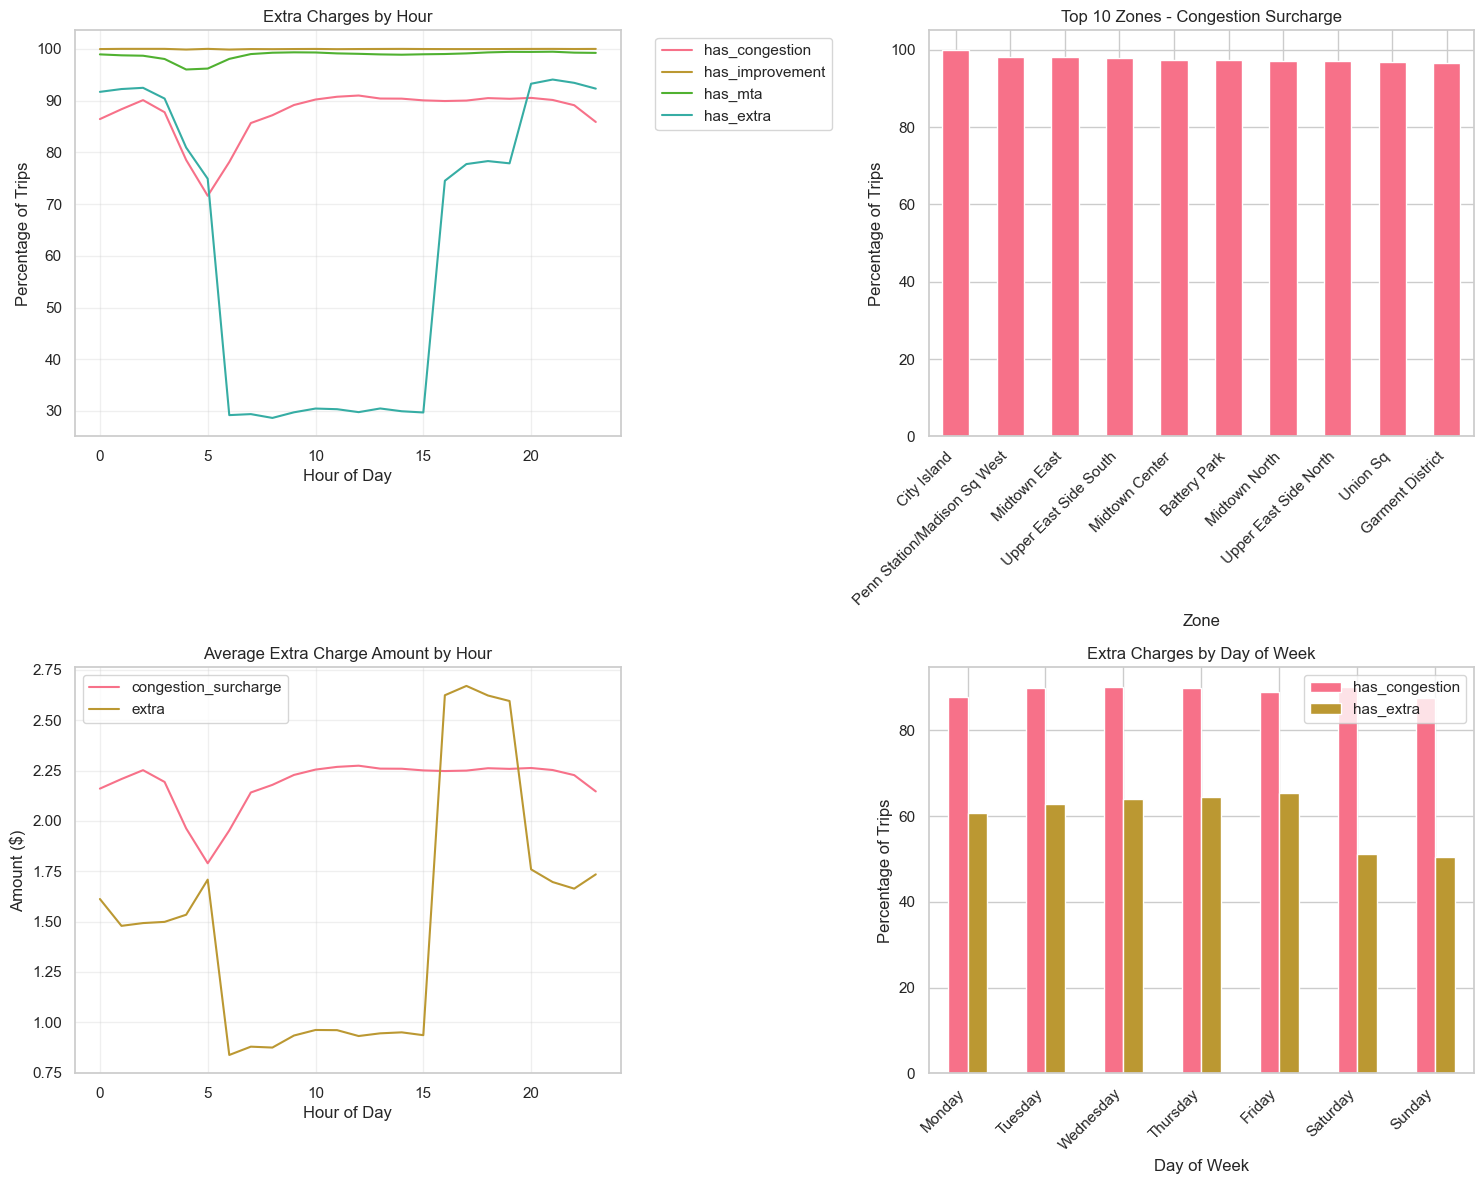


Overall Surcharge Statistics:
------------------------------------------------------------

Congestion Surcharge:
Applied to 89.3% of trips
Average amount when applied: $2.23

Improvement Surcharge:
Applied to 100.0% of trips
Average amount when applied: $1.00

Mta Tax:
Applied to 99.1% of trips
Average amount when applied: $0.50

Extra:
Applied to 60.1% of trips
Average amount when applied: $1.59


Top 10 Zones with Highest Extra Charges:
------------------------------------------------------------
                              has_congestion   has_extra
pickup_zone                                             
City Island                       100.000000  100.000000
Penn Station/Madison Sq West       98.162552   58.426333
Midtown East                       98.100796   61.241379
Upper East Side South              97.941820   56.786322
Midtown Center                     97.342897   63.998696
Battery Park                       97.321429   37.500000
Midtown North                      96.

In [203]:
# How often is each surcharge applied?
# Create a function to check if a trip has extra charges
def has_extra_charges(row):
    return {
        'congestion_surcharge': row['congestion_surcharge'] > 0,
        'improvement_surcharge': row['improvement_surcharge'] > 0,
        'mta_tax': row['mta_tax'] > 0,
        'extra': row['extra'] > 0
    }

# Add flags for each type of surcharge
df_valid_vendors['has_congestion'] = df_valid_vendors['congestion_surcharge'] > 0
df_valid_vendors['has_improvement'] = df_valid_vendors['improvement_surcharge'] > 0
df_valid_vendors['has_mta'] = df_valid_vendors['mta_tax'] > 0
df_valid_vendors['has_extra'] = df_valid_vendors['extra'] > 0

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Hourly distribution of extra charges
hourly_charges = df_valid_vendors.groupby('hour').agg({
    'has_congestion': 'mean',
    'has_improvement': 'mean',
    'has_mta': 'mean',
    'has_extra': 'mean'
}) * 100

hourly_charges.plot(ax=ax1)
ax1.set_title('Extra Charges by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Percentage of Trips')
ax1.legend(bbox_to_anchor=(1.05, 1))
ax1.grid(True, alpha=0.3)

# 2. Top 10 zones with highest extra charges
zone_charges = df_valid_vendors.groupby('pickup_zone').agg({
    'has_congestion': 'mean',
    'has_extra': 'mean'
}) * 100

top_congestion = zone_charges.nlargest(10, 'has_congestion')
top_congestion['has_congestion'].plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 Zones - Congestion Surcharge')
ax2.set_xlabel('Zone')
ax2.set_ylabel('Percentage of Trips')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Average amount of extra charges
extra_amounts = df_valid_vendors.groupby('hour').agg({
    'congestion_surcharge': 'mean',
    'extra': 'mean'
})

extra_amounts.plot(ax=ax3)
ax3.set_title('Average Extra Charge Amount by Hour')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Amount ($)')
ax3.grid(True, alpha=0.3)

# 4. Day of week analysis
daily_charges = df_valid_vendors.groupby('day_of_week').agg({
    'has_congestion': 'mean',
    'has_extra': 'mean'
}) * 100

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_charges = daily_charges.reindex(day_order)

daily_charges.plot(kind='bar', ax=ax4)
ax4.set_title('Extra Charges by Day of Week')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Percentage of Trips')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nOverall Surcharge Statistics:")
print("-" * 60)
for charge in ['congestion_surcharge', 'improvement_surcharge', 'mta_tax', 'extra']:
    mean_amount = df_valid_vendors[charge].mean()
    frequency = (df_valid_vendors[charge] > 0).mean() * 100
    print(f"\n{charge.replace('_', ' ').title()}:")
    print(f"Applied to {frequency:.1f}% of trips")
    print(f"Average amount when applied: ${mean_amount:.2f}")

print("\n\nTop 10 Zones with Highest Extra Charges:")
print("-" * 60)
print(top_congestion)

# Analyze time-based patterns
print("\n\nPeak vs Off-peak Analysis:")
print("-" * 60)
peak_hours = list(range(7,11)) + list(range(16,20))
peak_analysis = df_valid_vendors.groupby(df_valid_vendors['hour'].isin(peak_hours)).agg({
    'congestion_surcharge': ['mean', 'count'],
    'extra': ['mean', 'count']
})
print("\nPeak Hours (7-10 AM, 4-7 PM):")
print(peak_analysis.round(2))


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

__*Recommendations to Optimize Routing and Dispatching:*__

1. Time-Based Route Optimization
   - Avoid congested areas during 8-10 AM where average speed drops to 7.72 mph
   - Utilize alternative routes during evening peak (4-7 PM) when speeds average 8.42 mph
   - Take advantage of faster travel times during off-peak hours (average 8.62 mph at noon)

2. Distance-Based Efficiency
   - Focus on short trips (0-2 miles) during peak hours for maximum efficiency
   - Optimize long-distance routes (5+ miles) for airport runs
   - Plan routes to minimize empty returns, especially for airport trips

3. Peak Hour Management
   - Highest demand at 6 PM (18,751 trips) requires efficient route planning
   - Morning peak (7-10 AM) needs strategic positioning near business districts
   - Late night (11 PM-5 AM) requires focus on entertainment districts

4. Operational Improvements
   - Monitor and avoid slowest routes (e.g., Midtown South to Garment District: 4.33 mph)
   - Utilize data on inter-borough travel patterns for better route planning
   - Implement real-time traffic monitoring for dynamic route adjustments

5. Zone-Based Routing
   - Prioritize high-volume zones (JFK Airport: 13,638 trips)
   - Optimize routes between popular zone pairs
   - Create efficient coverage patterns for Manhattan (88.36% of all pickups)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

__*Strategic Positioning Recommendations:*__

1. Time-Based Positioning
   - Morning (7-10 AM): Position near residential areas like Upper East Side
   - Midday (11 AM-3 PM): Focus on business districts and shopping areas
   - Evening (4-7 PM): Concentrate around office areas and transport hubs
   - Night (11 PM-5 AM): Position near entertainment districts (12.1% of revenue)

2. Zone-Based Distribution
   High-Priority Zones (based on trip volume):
   - JFK Airport (13,638 trips)
   - Upper East Side South (12,341 trips)
   - Midtown Center (12,269 trips)
   - Upper East Side North (11,083 trips)
   - LaGuardia Airport (9,018 trips)

3. Weekly Pattern Optimization
   Weekdays:
   - Business districts during rush hours
   - Airport coverage during off-peak
   
   Weekends:
   - Entertainment districts
   - Shopping areas
   - Tourist locations

4. Seasonal Adjustments
   - Q2 (26.67% revenue): Increase coverage
   - Q3 (22.77% revenue): Adjust for lower demand
   - Q4 (27.02% revenue): Maximum deployment

5. Special Event Considerations
   - Monitor and adjust for local events
   - Coordinate with airport schedules
   - Account for weather conditionsations__

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data-Driven Pricing Strategy Adjustments:

1. Distance-Based Price Structure
---------------------------------------
SHORT TRIPS (0-2 miles)
* Rate: $9.49 per mile
* Best for: Local travel, business district trips

MEDIUM TRIPS (2-5 miles)
* Rate: $6.28 per mile
* Best for: Inter-borough, cross-town travel

LONG TRIPS (5+ miles)
* Rate: $4.46 per mile
* Best for: Airport runs, outer borough service

2. Time-Based Pricing
---------------------------------------
PEAK HOURS (4-7 PM)
* Implement surge pricing
* Monitor competitor rates
* Adjust based on demand

BUSINESS HOURS (9 AM-5 PM)
* Standard rate plus congestion charge
* Corporate client rates
* Volume-based discounts

LATE NIGHT SERVICE
* Special rate structure
* Safety premium
* Guaranteed service fee

3. Zone-Based Pricing
---------------------------------------
MANHATTAN BUSINESS DISTRICT
* Premium rates during peak hours
* Corporate account options
* Regular client discounts

AIRPORT SERVICE
* Fixed rate packages
* Terminal-specific pricing
* Flight delay adjustment rates

4. Special Condition Adjustments
---------------------------------------
* Congestion pricing (89.3% trips affected)
* Weather condition surcharges
* Special event rates

5. Payment Incentives
---------------------------------------
* Card payment bonuses
* Loyalty program benefits
* Corporate account rateslty program benefits
   * Corporate account rateslty program benefits
   * Corporate account rateslty program benefits
   * Corporate account rates Loyalty program benefits
   * Corporate account rates

<h1>Additional Strategic Recommendations:</h1>

1. Technical and Data Implementation
   - Predictive analytics for demand forecasting
   - Real-time heat maps for demand visualization
   - Machine learning for route optimization
   - Driver performance tracking systems
   - Automated surge pricing mechanisms

2. Market Segmentation Strategy
   Business Travelers:
   - Premium guaranteed pickup service
   - Corporate account management
   - Express route options

   Tourists:
   - Airport-attraction packages
   - Multi-stop tour rates
   - Simplified fixed pricing

   Regular Commuters:
   - Loyalty program
   - Subscription-based services
   - Peak hour priority

3. Advanced Operational Metrics
   Performance Tracking:
   - Route efficiency scores
   - Driver rating system
   - Vehicle utilization rates
   - Peak hour performance metrics

   Quality Control:
   - Customer feedback integration
   - Service level monitoring
   - Response time optimization
   - Complaint resolution tracking

4. Competitive Edge Initiatives
   Service Differentiation:
   - Premium vehicle options
   - Pre-scheduled rides
   - Multi-language support
   - Special event services

   Technology Integration:
   - Mobile app enhancement
   - Digital payment options
   - Real-time tracking
   - Automated customer support